# Exploratory Data Analysis: Startup Ecosystems Comparison

## Introduction

In this notebook, we continue our Exploratory Data Analysis (EDA) of Foursquare API data about several Startup Ecosystems in the France. We will compare the data gathered for the Startup Ecosystem around thirteen major french cities with data of both the Silicon Valley Startup Ecosystem and Boston (route 128) one. The objective of this analysis is to get a satisfactory data understanding before pursiung to data preparation, modelling and evaluation.

Foursquare API being a geo dataset, the analysis will mainly revolve around geographical analysis and Data Visualization on maps. Our area of investigation will focus on the category and quantity of organizations and companies that are related to startup ecosystems. 

Our EDA approach follows the **Data Science Methodology CRISP-DM**. For more info about this approach, check this [Wikipedia page](https://en.wikipedia.org/wiki/Cross-industry_standard_process_for_data_mining)

## Table of contents
1. [Data Collection](#item1)
2. [Raw Data Analysis](#item2)
3. [Normalized Data Analysis](#item3)
4. [Conclusions](#item4)


First let's download all the libraries required for this notebook.

In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from bs4 import BeautifulSoup # library for web parsing 

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
from geopy import distance

import requests # library to handle requests
import urllib.request
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib as mpl
import matplotlib.colors as colors
import matplotlib.pyplot as plt
mpl.style.use('ggplot') # optional: for ggplot-like style


#! pip install seaborn
import seaborn as sns

#set font size of labels on matplotlib plots
plt.rc('font', size=16)

#set style of plots
sns.set_style('white')

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes 

import folium # map rendering library

from lxml.html import fromstring

from scipy.stats import linregress

print('Libraries imported.')

Libraries imported.


## 1. Data Collection <a id='item1'></a>

### 1.1. Previous work

We have previously collected data about severals Startup Ecosystems as follows:
- France:
    - [Bordeaux](https://github.com/MattSonnati/where_is_the_french_silicon_valley/blob/master/EDA%20Foursquare%20-%20Bordeaux%20Startup%20Ecosystem.ipynb)
    - [Clermont-Ferrand](https://github.com/MattSonnati/where_is_the_french_silicon_valley/blob/master/EDA%20Foursquare%20-%20Clermont-Ferrand%20Startup%20Ecosystem.ipynb)
    - [Grenoble](https://github.com/MattSonnati/where_is_the_french_silicon_valley/blob/master/EDA%20Foursquare%20-%20Grenoble%20Startup%20Ecosystem.ipynb)
    - [Lille](https://github.com/MattSonnati/where_is_the_french_silicon_valley/blob/master/EDA%20Foursquare%20-%20Lille%20Startup%20Ecosystem.ipynb)
    - [Lyon](https://github.com/MattSonnati/where_is_the_french_silicon_valley/blob/master/EDA%20Foursquare%20-%20Lyon%20Startup%20Ecosystem.ipynb)
    - [Marseille Aix-en-provence](https://github.com/MattSonnati/where_is_the_french_silicon_valley/blob/master/EDA%20Foursquare%20-%20Marseille%20Aix-en-provence%20Startup%20Ecosystem.ipynb)
    - [Montpellier](https://github.com/MattSonnati/where_is_the_french_silicon_valley/blob/master/EDA%20Foursquare%20-%20Montpellier%20Startup%20Ecosystem.ipynb)
    - [Nantes](https://github.com/MattSonnati/where_is_the_french_silicon_valley/blob/master/EDA%20Foursquare%20-%20Nantes%20Startup%20Ecosystem.ipynb)
    - [Nice Sophia Antipolis](https://github.com/MattSonnati/where_is_the_french_silicon_valley/blob/master/EDA%20Foursquare%20-%20Nice%20Sophia%20Antipolis%20Startup%20Ecosystem.ipynb)
    - [Paris](https://github.com/MattSonnati/where_is_the_french_silicon_valley/blob/master/EDA%20Foursquare%20-%20Paris%20Startup%20Ecosystem.ipynb)
    - [Rennes](https://github.com/MattSonnati/where_is_the_french_silicon_valley/blob/master/EDA%20Foursquare%20-%20Rennes%20Startup%20Ecosystem.ipynb)
    - [Strasbourg](https://github.com/MattSonnati/where_is_the_french_silicon_valley/blob/master/EDA%20Foursquare%20-%20Strasbourg%20Startup%20Ecosystem.ipynb)
    - [Toulouse](https://github.com/MattSonnati/where_is_the_french_silicon_valley/blob/master/EDA%20Foursquare%20-%20Toulouse%20Startup%20Ecosystem.ipynb)
    
- US:    
    - [Boston](https://github.com/MattSonnati/where_is_the_french_silicon_valley/blob/master/EDA%20Foursquare%20-%20Boston%20Startup%20Ecosystem.ipynb)
    - [Silicon Valley](https://github.com/MattSonnati/where_is_the_french_silicon_valley/blob/master/EDA%20Foursquare%20-%20Silicon%20Valley%20Startup%20Ecosystem.ipynb)
    

There are 13 french cities and 2 US cities.
The 13 french cities were selected according to two articles which listed [Startups Ecosystem in the north of France ](https://www.welcometothejungle.co/articles/silicon-valley-francaise-nord) and [those in the south of France ](https://www.welcometothejungle.co/articles/tech-silicon-valley-francaise-province-sud). This list of cities is also closed to the ones selected by the [French Tech label](https://www.lafrenchtech.com/en/). 

Silicon Valley was added as the reference point for the best Startup Ecosystem in the world.

For those of you who are wondering why we also added Boston surronding in the comparison, check this article from UC Berkeley Professor [AnnaLee Saxenian](https://hbr.org/2014/12/what-still-makes-silicon-valley-so-special).

### 1.2. Data concatenation

We start by importing data as individual dataframe.

In [3]:
#BORDEAUX
bordeaux_ecosystem = pd.read_csv('https://raw.githubusercontent.com/MattSonnati/where_is_the_french_silicon_valley/master/bordeaux_startup_ecosystem_place_list.csv')

# drop useless columns (in pandas axis=0 represents rows (default) and axis=1 represents columns).
bordeaux_ecosystem.drop(['Unnamed: 0','categories','categoriesList'], axis=1, inplace=True)

#reorder columns
bordeaux_ecosystem = bordeaux_ecosystem[['city',
                                         'primary_category_name',
                                         'name',
                                         'lat',
                                         'lng',                                         
                                         'postalCode',
                                         'state',
                                         'country',
                                         'cc',
                                         'primary_category_id',
                                         'id'
                                         ]]
bordeaux_ecosystem['city']='Bordeaux area'
bordeaux_ecosystem.head()


,city,primary_category_name,name,lat,lng,postalCode,state,country,cc,primary_category_id,id
0,Bordeaux area,Tech Startup,Muxu.Muxu,44.830830,-0.597194,33000,Nouvelle-Aquitaine,France,FR,4bf58dd8d48988d125941735,59afa995c876c81ac31044c2
1,Bordeaux area,Tech Startup,Speak Fabrik,44.852871,-0.608156,33200,Aquitaine,France,FR,4bf58dd8d48988d125941735,4fc485ace4b02051855feda9
2,Bordeaux area,Tech Startup,La Compagnie Hyperactive,44.834234,-0.568541,33000,Aquitaine,France,FR,4bf58dd8d48988d125941735,515401b0e4b0dc82758be1f3
3,Bordeaux area,Office,Groupe On Air,44.855465,-0.568064,33300,Aquitaine,France,FR,4bf58dd8d48988d124941735,4d8511c3194a88bf287d98a7
4,Bordeaux area,Tech Startup,CloudPosting,44.837089,-0.568402,NaN,NaN,France,FR,4bf58dd8d48988d125941735,5052e42ae4b0244ddd3e3c32


In [4]:
#Boston
boston_ecosystem = pd.read_csv('https://raw.githubusercontent.com/MattSonnati/where_is_the_french_silicon_valley/master/boston_startup_ecosystem_place_list.csv')

# drop useless columns (in pandas axis=0 represents rows (default) and axis=1 represents columns).
boston_ecosystem.drop(['Unnamed: 0','categories','categoriesList'], axis=1, inplace=True)

#reorder columns
boston_ecosystem = boston_ecosystem[['city',
                                         'primary_category_name',
                                         'name',
                                         'lat',
                                         'lng',                                         
                                         'postalCode',
                                         'state',
                                         'country',
                                         'cc',
                                         'primary_category_id',
                                         'id'
                                         ]]
boston_ecosystem['city']='Boston area'
boston_ecosystem.head()

,city,primary_category_name,name,lat,lng,postalCode,state,country,cc,primary_category_id,id
0,Boston area,Tech Startup,Wayfair Office,42.347197,-71.078305,02116,MA,United States,US,4bf58dd8d48988d125941735,53b16953498e81285144c0e8
1,Boston area,Tech Startup,DataRobot,42.355950,-71.052410,02110,MA,United States,US,4bf58dd8d48988d125941735,548f0e7c498ee06c32805296
2,Boston area,Office,HubSpot,42.370132,-71.076272,02141,MA,United States,US,4bf58dd8d48988d124941735,569e69da498ef17cd8221185
3,Boston area,Office,HubSpot,42.369746,-71.077678,02141,MA,United States,US,4bf58dd8d48988d124941735,4a60d55af964a52040c11fe3
4,Boston area,Tech Startup,Toast Inc,42.344895,-71.103175,02215,MA,United States,US,4bf58dd8d48988d125941735,53b3fd51498eedf328db817b


In [5]:
#Clermont-Ferrand
clermont_ecosystem = pd.read_csv('https://raw.githubusercontent.com/MattSonnati/where_is_the_french_silicon_valley/master/clermont_startup_ecosystem_place_list.csv')

# drop useless columns (in pandas axis=0 represents rows (default) and axis=1 represents columns).
clermont_ecosystem.drop(['Unnamed: 0','categories','categoriesList'], axis=1, inplace=True)

#reorder columns
clermont_ecosystem = clermont_ecosystem[['city',
                                         'primary_category_name',
                                         'name',
                                         'lat',
                                         'lng',                                         
                                         'postalCode',
                                         'state',
                                         'country',
                                         'cc',
                                         'primary_category_id',
                                         'id'
                                         ]]
clermont_ecosystem['city']='Clermont-Ferrand area'
clermont_ecosystem.head()

,city,primary_category_name,name,lat,lng,postalCode,state,country,cc,primary_category_id,id
0,Clermont-Ferrand area,Tech Startup,Almerys,45.787209,3.112006,NaN,NaN,France,FR,4bf58dd8d48988d125941735,4ef0655877c8053fbcd758f6
1,Clermont-Ferrand area,Tech Startup,Bureau d'OCP,45.761141,3.090313,NaN,NaN,France,FR,4bf58dd8d48988d125941735,4f50b763e4b002b4786b8736
2,Clermont-Ferrand area,Tech Startup,Prizee,45.759133,3.129971,63000,Auvergne,France,FR,4bf58dd8d48988d125941735,4eeb7cb58231035d6c5ce8b9
3,Clermont-Ferrand area,Tech Startup,Next Media,45.769035,3.129074,NaN,NaN,France,FR,4bf58dd8d48988d125941735,4fb2139fe4b0769a3acd52e0
4,Clermont-Ferrand area,Tech Startup,Echodia,45.775354,3.095308,63000,Auvergne,France,FR,4bf58dd8d48988d125941735,4e4308597d8b2eefb3b29787


In [6]:
#Grenoble
grenoble_ecosystem = pd.read_csv('https://raw.githubusercontent.com/MattSonnati/where_is_the_french_silicon_valley/master/grenoble_startup_ecosystem_place_list.csv')

# drop useless columns (in pandas axis=0 represents rows (default) and axis=1 represents columns).
grenoble_ecosystem.drop(['Unnamed: 0','categories','categoriesList'], axis=1, inplace=True)

#reorder columns
grenoble_ecosystem = grenoble_ecosystem[['city',
                                         'primary_category_name',
                                         'name',
                                         'lat',
                                         'lng',                                         
                                         'postalCode',
                                         'state',
                                         'country',
                                         'cc',
                                         'primary_category_id',
                                         'id'
                                         ]]
grenoble_ecosystem['city']='Grenoble area'
grenoble_ecosystem.head()

,city,primary_category_name,name,lat,lng,postalCode,state,country,cc,primary_category_id,id
0,Grenoble area,Building,MINATEC,45.195714,5.709476,38000,Rhône-Alpes,France,FR,4bf58dd8d48988d130941735,4b99fe3af964a520339a35e3
1,Grenoble area,College Lab,MINATEC IDEAs Laboratory,45.193386,5.707420,38000,Rhône-Alpes,France,FR,4bf58dd8d48988d1a5941735,4f967000e4b03fde9244c7a0
2,Grenoble area,Tech Startup,BiBOARD HQ,45.181266,5.719199,NaN,NaN,France,FR,4bf58dd8d48988d125941735,5630898c498e6ca22528b543
3,Grenoble area,Tech Startup,1000volt South Zone Campus,45.173259,5.693405,NaN,NaN,France,FR,4bf58dd8d48988d125941735,5013cb2ae4b088cc6c21f3e7
4,Grenoble area,Tech Startup,1997media,45.189235,5.715613,NaN,NaN,France,FR,4bf58dd8d48988d125941735,5007d38ce4b0b3c66224d40a


In [7]:
#Lyon
lyon_ecosystem = pd.read_csv('https://raw.githubusercontent.com/MattSonnati/where_is_the_french_silicon_valley/master/lyon_startup_ecosystem_place_list.csv')

# drop useless columns (in pandas axis=0 represents rows (default) and axis=1 represents columns).
lyon_ecosystem.drop(['Unnamed: 0','categories','categoriesList'], axis=1, inplace=True)

#reorder columns
lyon_ecosystem = lyon_ecosystem[['city',
                                         'primary_category_name',
                                         'name',
                                         'lat',
                                         'lng',                                         
                                         'postalCode',
                                         'state',
                                         'country',
                                         'cc',
                                         'primary_category_id',
                                         'id'
                                         ]]
lyon_ecosystem['city']='Lyon area'
lyon_ecosystem.head()


,city,primary_category_name,name,lat,lng,postalCode,state,country,cc,primary_category_id,id
0,Lyon area,Tech Startup,Infra | Net HQ,45.743700,4.873071,NaN,NaN,France,FR,4bf58dd8d48988d125941735,4ee529c1b8f790fe4078eaa2
1,Lyon area,Tech Startup,Michelin Connected,45.760585,4.850215,69003,Rhône-Alpes,France,FR,4bf58dd8d48988d125941735,5a1e7bbf916bc14874b8a4e6
2,Lyon area,Tech Startup,Keyrus,45.786714,4.813814,NaN,NaN,France,FR,4bf58dd8d48988d125941735,5714ced7498e562ea4ec86c5
3,Lyon area,Tech Startup,Axeleo,45.759007,4.835032,NaN,Rhône-Alpes,France,FR,4bf58dd8d48988d125941735,589c8ccdce66aa29febc8919
4,Lyon area,Tech Startup,Insign,45.766441,4.836012,69001,Rhône-Alpes,France,FR,4bf58dd8d48988d125941735,51fb5e6d501912e0811e6dd2


In [8]:
#Nice Sophia Antipolis
nice_ecosystem = pd.read_csv('https://raw.githubusercontent.com/MattSonnati/where_is_the_french_silicon_valley/master/nice_sophia_antipolis_startup_ecosystem_place_list.csv')

# drop useless columns (in pandas axis=0 represents rows (default) and axis=1 represents columns).
nice_ecosystem.drop(['Unnamed: 0','categories','categoriesList'], axis=1, inplace=True)

#reorder columns
nice_ecosystem = nice_ecosystem[['city',
                                         'primary_category_name',
                                         'name',
                                         'lat',
                                         'lng',                                         
                                         'postalCode',
                                         'state',
                                         'country',
                                         'cc',
                                         'primary_category_id',
                                         'id'
                                         ]]
nice_ecosystem['city']='Nice Sophia Antipolis area'
nice_ecosystem.head()


,city,primary_category_name,name,lat,lng,postalCode,state,country,cc,primary_category_id,id
0,Nice Sophia Antipolis area,Tech Startup,Qwant,43.703476,7.260031,NaN,NaN,France,FR,4bf58dd8d48988d125941735,51e9100d498e5868804f0261
1,Nice Sophia Antipolis area,Tech Startup,Enterprise AB,43.711983,7.253981,06100,Provence-Alpes-Côte d'Azur,France,FR,4bf58dd8d48988d125941735,4fe4297f4fc6bb410d1cf2f9
2,Nice Sophia Antipolis area,Tech Startup,The Apps Factory,43.704368,7.266776,06000,Provence-Alpes-Côte d'Azur,France,FR,4bf58dd8d48988d125941735,4d2deceeda7cb60c3f2c6bd4
3,Nice Sophia Antipolis area,Tech Startup,Tokidev,43.700737,7.287678,NaN,NaN,France,FR,4bf58dd8d48988d125941735,50213336e4b0432e8ace55ac
4,Nice Sophia Antipolis area,Tech Startup,Tycoon Informatique,43.703575,7.268657,06000,Provence-Alpes-Côte d'Azur,France,FR,4bf58dd8d48988d125941735,5007f59ee4b05378761eeefc


In [9]:
#Paris
paris_ecosystem = pd.read_csv('https://raw.githubusercontent.com/MattSonnati/where_is_the_french_silicon_valley/master/paris_startup_ecosystem_place_list.csv')

# drop useless columns (in pandas axis=0 represents rows (default) and axis=1 represents columns).
paris_ecosystem.drop(['Unnamed: 0','categories','categoriesList'], axis=1, inplace=True)

#reorder columns
paris_ecosystem = paris_ecosystem[['city',
                                         'primary_category_name',
                                         'name',
                                         'lat',
                                         'lng',                                         
                                         'postalCode',
                                         'state',
                                         'country',
                                         'cc',
                                         'primary_category_id',
                                         'id'
                                         ]]
paris_ecosystem['city']='Paris area'
paris_ecosystem.head()


,city,primary_category_name,name,lat,lng,postalCode,state,country,cc,primary_category_id,id
0,Paris area,Tech Startup,Qonto HQ,48.868517,2.345687,75003,Île-de-France,France,FR,4bf58dd8d48988d125941735,58a16c5f51d19e06ce98f38d
1,Paris area,Tech Startup,Salesforce France,48.856391,2.293381,75007,Île-de-France,France,FR,4bf58dd8d48988d125941735,4dac5df543a112819724533f
2,Paris area,Tech Startup,Algolia,48.880447,2.327044,75008,Île-de-France,France,FR,4bf58dd8d48988d125941735,59f711f53d4791157b9e7f62
3,Paris area,Tech Startup,Criteo,48.879049,2.332151,75009,Île-de-France,France,FR,4bf58dd8d48988d125941735,4fdee1f3e4b014c45c45905c
4,Paris area,Tech Startup,Spendesk HQ,48.872823,2.350290,75010,Île-de-France,France,FR,4bf58dd8d48988d125941735,59e9b4ec3abcaf334aa66d07


In [10]:
#Silicon Valley
silicon_valley_ecosystem = pd.read_csv('https://raw.githubusercontent.com/MattSonnati/where_is_the_french_silicon_valley/master/silicon_valley_startup_ecosystem_place_list.csv')

# drop useless columns (in pandas axis=0 represents rows (default) and axis=1 represents columns).
silicon_valley_ecosystem.drop(['Unnamed: 0','categories','categoriesList'], axis=1, inplace=True)

#reorder columns
silicon_valley_ecosystem = silicon_valley_ecosystem[['city',
                                         'primary_category_name',
                                         'name',
                                         'lat',
                                         'lng',                                         
                                         'postalCode',
                                         'state',
                                         'country',
                                         'cc',
                                         'primary_category_id',
                                         'id'
                                         ]]
silicon_valley_ecosystem['city']='Silicon Valley'
silicon_valley_ecosystem.head()


,city,primary_category_name,name,lat,lng,postalCode,state,country,cc,primary_category_id,id
0,Silicon Valley,Tech Startup,Airbnb HQ,37.771947,-122.405407,94103,CA,United States,US,4bf58dd8d48988d125941735,51c7e853abd8cf897278ef48
1,Silicon Valley,Office,Uber HQ,37.775820,-122.418015,94103,CA,United States,US,4bf58dd8d48988d124941735,505bc25be4b0c8fbe4f527af
2,Silicon Valley,Tech Startup,Lyft HQ,37.776339,-122.391740,94107,CA,United States,US,4bf58dd8d48988d125941735,57559629498e7c2350015efa
3,Silicon Valley,Office,Twitter HQ,37.776695,-122.416848,94103,CA,United States,US,4bf58dd8d48988d124941735,4ee0ecde29c2c6e332924109
4,Silicon Valley,Tech Startup,Uber HQ - 555,37.790112,-122.400330,94105,CA,United States,US,4bf58dd8d48988d125941735,580eb21938fa63491ce4a0c2


In [11]:
#Toulouse
toulouse_ecosystem = pd.read_csv('https://raw.githubusercontent.com/MattSonnati/where_is_the_french_silicon_valley/master/Toulouse_startup_ecosystem_place_list.csv')

# drop useless columns (in pandas axis=0 represents rows (default) and axis=1 represents columns).
toulouse_ecosystem.drop(['Unnamed: 0','categories','categoriesList'], axis=1, inplace=True)

#reorder columns
toulouse_ecosystem = toulouse_ecosystem[['city',
                                         'primary_category_name',
                                         'name',
                                         'lat',
                                         'lng',                                         
                                         'postalCode',
                                         'state',
                                         'country',
                                         'cc',
                                         'primary_category_id',
                                         'id'
                                         ]]
toulouse_ecosystem['city']='Toulouse area'
toulouse_ecosystem.head()


,city,primary_category_name,name,lat,lng,postalCode,state,country,cc,primary_category_id,id
0,Toulouse area,Tech Startup,EasyMile,43.592424,1.445783,31400,Midi-Pyrénées,France,FR,4bf58dd8d48988d125941735,587fc1e333a24538c59b74e0
1,Toulouse area,Tech Startup,Mediameeting,43.571457,1.424779,NaN,Midi-Pyrénées,France,FR,4bf58dd8d48988d125941735,4dc24b2a1f6ebdce47251ff6
2,Toulouse area,Tech Startup,LoKan.fr,43.625447,1.492524,31130,Midi-Pyrénées,France,FR,4bf58dd8d48988d125941735,4fa24169e4b0857bbd4a4342
3,Toulouse area,Tech Startup,W2P Production & Digital,43.591223,1.442164,31400,Midi-Pyrénées,France,FR,4bf58dd8d48988d125941735,4fb66c59e4b0467a1d8e658c
4,Toulouse area,Tech Startup,Console Syndrome Building,43.609576,1.456128,31500,Midi-Pyrénées,France,FR,4bf58dd8d48988d125941735,508fe7d690e7fa3af771fcb7


In [12]:
#Strasbourg
strasbourg_ecosystem = pd.read_csv('https://raw.githubusercontent.com/MattSonnati/where_is_the_french_silicon_valley/master/Strasbourg_startup_ecosystem_place_list.csv')

# drop useless columns (in pandas axis=0 represents rows (default) and axis=1 represents columns).
strasbourg_ecosystem.drop(['Unnamed: 0','categories','categoriesList'], axis=1, inplace=True)

#reorder columns
strasbourg_ecosystem = strasbourg_ecosystem[['city',
                                         'primary_category_name',
                                         'name',
                                         'lat',
                                         'lng',                                         
                                         'postalCode',
                                         'state',
                                         'country',
                                         'cc',
                                         'primary_category_id',
                                         'id'
                                         ]]
strasbourg_ecosystem['city']='Strasbourg area'
strasbourg_ecosystem.head()


,city,primary_category_name,name,lat,lng,postalCode,state,country,cc,primary_category_id,id
0,Strasbourg area,Coworking Space,La Plage Digitale,48.573040,7.760223,67100,Alsace,France,FR,4bf58dd8d48988d174941735,4f75decce4b05b70749b4131
1,Strasbourg area,Tech Startup,Anaveo Est,48.623553,7.720189,67207,Alsace,France,FR,4bf58dd8d48988d125941735,4d274776849f3704a9786741
2,Strasbourg area,Office,Coelis,48.583987,7.742114,NaN,NaN,France,FR,4bf58dd8d48988d124941735,5140b1ade4b084291d1763c9
3,Strasbourg area,Tech Startup,PH8,48.577466,7.749779,NaN,NaN,France,FR,4bf58dd8d48988d125941735,52d829fc498ec7119117a5d7
4,Strasbourg area,Tech Startup,Technology And Strategy 3 Av,48.587688,7.754558,67000,Alsace,France,FR,4bf58dd8d48988d125941735,4ffa7f32e4b05369d1437d52


In [13]:
#Rennes
rennes_ecosystem = pd.read_csv('https://raw.githubusercontent.com/MattSonnati/where_is_the_french_silicon_valley/master/Rennes_startup_ecosystem_place_list.csv')

# drop useless columns (in pandas axis=0 represents rows (default) and axis=1 represents columns).
rennes_ecosystem.drop(['Unnamed: 0','categories','categoriesList'], axis=1, inplace=True)

#reorder columns
rennes_ecosystem = rennes_ecosystem[['city',
                                         'primary_category_name',
                                         'name',
                                         'lat',
                                         'lng',                                         
                                         'postalCode',
                                         'state',
                                         'country',
                                         'cc',
                                         'primary_category_id',
                                         'id'
                                         ]]
rennes_ecosystem['city']='Rennes area'
rennes_ecosystem.head()



,city,primary_category_name,name,lat,lng,postalCode,state,country,cc,primary_category_id,id
0,Rennes area,Tech Startup,Alkante,48.100332,-1.622623,35530,Bretagne,France,FR,4bf58dd8d48988d125941735,51384c10e4b04267f9cd64dd
1,Rennes area,Office,OVH,48.127739,-1.624065,35510,Bretagne,France,FR,4bf58dd8d48988d124941735,59b661f047f8761788cdd6d0
2,Rennes area,Tech Startup,Technopole Rennes Atalante,48.130486,-1.623190,NaN,Bretagne,France,FR,4bf58dd8d48988d125941735,4c35fcde7cc0c9b6d6cef59a
3,Rennes area,Coffee Shop,Le Mabilay,48.106878,-1.694182,35000,Bretagne,France,FR,4bf58dd8d48988d1e0931735,54c7d8f4498ebfa050cd2447
4,Rennes area,Tech Startup,Alliance Qualité Logicielle (AQL),48.119952,-1.630096,35510,Bretagne,France,FR,4bf58dd8d48988d125941735,4d9adb78e086a35de84ac3ad


In [14]:
#Nantes
nantes_ecosystem = pd.read_csv('https://raw.githubusercontent.com/MattSonnati/where_is_the_french_silicon_valley/master/Nantes_startup_ecosystem_place_list.csv')

# drop useless columns (in pandas axis=0 represents rows (default) and axis=1 represents columns).
nantes_ecosystem.drop(['Unnamed: 0','categories','categoriesList'], axis=1, inplace=True)

#reorder columns
nantes_ecosystem = nantes_ecosystem[['city',
                                         'primary_category_name',
                                         'name',
                                         'lat',
                                         'lng',                                         
                                         'postalCode',
                                         'state',
                                         'country',
                                         'cc',
                                         'primary_category_id',
                                         'id'
                                         ]]
nantes_ecosystem['city']='Nantes area'
nantes_ecosystem.head()


,city,primary_category_name,name,lat,lng,postalCode,state,country,cc,primary_category_id,id
0,Nantes area,Tech Startup,Nemo lab Airbus,47.317565,-2.165497,44550,Pays de la Loire,France,FR,4bf58dd8d48988d125941735,4f5f6003e4b0a76b710d2135
1,Nantes area,Tech Startup,iAdvize,47.217335,-1.534618,44000,Pays de la Loire,France,FR,4bf58dd8d48988d125941735,5b30ddcffe63bd002cf38013
2,Nantes area,Tech Startup,Akeneo HQ,47.211668,-1.575907,NaN,NaN,France,FR,4bf58dd8d48988d125941735,56fe54b5498efebb296f356c
3,Nantes area,Tech Startup,Sodius,47.198104,-1.596490,NaN,NaN,France,FR,4bf58dd8d48988d125941735,53bc1332498e97b8078bcedc
4,Nantes area,Tech Startup,Checkspear HQ,47.207064,-1.560486,44000,Pays de la Loire,France,FR,4bf58dd8d48988d125941735,4e86cbb25503cfdfd36183a6


In [15]:
#Montpellier
montpellier_ecosystem = pd.read_csv('https://raw.githubusercontent.com/MattSonnati/where_is_the_french_silicon_valley/master/Montpellier_startup_ecosystem_place_list.csv')

# drop useless columns (in pandas axis=0 represents rows (default) and axis=1 represents columns).
montpellier_ecosystem.drop(['Unnamed: 0','categories','categoriesList'], axis=1, inplace=True)

#reorder columns
montpellier_ecosystem = montpellier_ecosystem[['city',
                                         'primary_category_name',
                                         'name',
                                         'lat',
                                         'lng',                                         
                                         'postalCode',
                                         'state',
                                         'country',
                                         'cc',
                                         'primary_category_id',
                                         'id'
                                         ]]
montpellier_ecosystem['city']='Montpellier area'
montpellier_ecosystem.head()



,city,primary_category_name,name,lat,lng,postalCode,state,country,cc,primary_category_id,id
0,Montpellier area,Tech Startup,Weda,43.602074,3.879319,34000,Languedoc-Roussillon,France,FR,4bf58dd8d48988d125941735,575582cc498eef4971121ed2
1,Montpellier area,Tech Startup,Awox,43.607165,3.914067,34000,Languedoc-Roussillon,France,FR,4bf58dd8d48988d125941735,503e036ee4b06e5da284d992
2,Montpellier area,Tech Startup,Teads,43.617521,3.915147,NaN,NaN,France,FR,4bf58dd8d48988d125941735,52665ca011d2e0c89b197686
3,Montpellier area,Tech Startup,AMI Software,43.609674,3.912261,NaN,NaN,France,FR,4bf58dd8d48988d125941735,4ca1c3783244b21a3bdd3d03
4,Montpellier area,Tech Startup,Deegr Office,43.632861,3.862811,NaN,NaN,France,FR,4bf58dd8d48988d125941735,4e71ff261838677343367a47


In [16]:
#Marseille Aix-en-provence
marseille_ecosystem = pd.read_csv('https://raw.githubusercontent.com/MattSonnati/where_is_the_french_silicon_valley/master/Marseille_startup_ecosystem_place_list.csv')

# drop useless columns (in pandas axis=0 represents rows (default) and axis=1 represents columns).
marseille_ecosystem.drop(['Unnamed: 0','categories','categoriesList'], axis=1, inplace=True)

#reorder columns
marseille_ecosystem = marseille_ecosystem[['city',
                                         'primary_category_name',
                                         'name',
                                         'lat',
                                         'lng',                                         
                                         'postalCode',
                                         'state',
                                         'country',
                                         'cc',
                                         'primary_category_id',
                                         'id'
                                         ]]
marseille_ecosystem['city']='Marseille Aix-en-provence area'
marseille_ecosystem.head()


,city,primary_category_name,name,lat,lng,postalCode,state,country,cc,primary_category_id,id
0,Marseille Aix-en-provence area,Tech Startup,Datacenter interxion MRS1,43.310684,5.373925,NaN,Provence-Alpes-Côte d'Azur,France,FR,4bf58dd8d48988d125941735,4c19d2d9d4d9c9281494f129
1,Marseille Aix-en-provence area,Tech Startup,Exmagina,43.310343,5.371134,13003.0,Provence-Alpes-Côte d'Azur,France,FR,4bf58dd8d48988d125941735,51481fdbe4b03dfb48849c7d
2,Marseille Aix-en-provence area,Tech Startup,Atlantis Multimedia,43.290933,5.377511,NaN,Provence-Alpes-Côte,France,FR,4bf58dd8d48988d125941735,4c63dd29e1621b8dd6e52653
3,Marseille Aix-en-provence area,Tech Startup,Ubiq Toolbox,43.309254,5.389974,13033.0,Provence-Alpes-Côte d'Azur,France,FR,4bf58dd8d48988d125941735,53568bda498eb101bd5703c1
4,Marseille Aix-en-provence area,Tech Startup,BibLibre,43.286114,5.377294,13006.0,Provence-Alpes-Côte d'Azur,France,FR,4bf58dd8d48988d125941735,51135b54e4b006dae0f18d6f


In [17]:
#Lille
lille_ecosystem = pd.read_csv('https://raw.githubusercontent.com/MattSonnati/where_is_the_french_silicon_valley/master/Lille_startup_ecosystem_place_list.csv')

# drop useless columns (in pandas axis=0 represents rows (default) and axis=1 represents columns).
lille_ecosystem.drop(['Unnamed: 0','categories','categoriesList'], axis=1, inplace=True)

#reorder columns
lille_ecosystem = lille_ecosystem[['city',
                                         'primary_category_name',
                                         'name',
                                         'lat',
                                         'lng',                                         
                                         'postalCode',
                                         'state',
                                         'country',
                                         'cc',
                                         'primary_category_id',
                                         'id'
                                         ]]
lille_ecosystem['city']='Lille area'
lille_ecosystem.head()



,city,primary_category_name,name,lat,lng,postalCode,state,country,cc,primary_category_id,id
0,Lille area,Tech Startup,Modde bouwmaterialen,50.856680,3.253187,NaN,West-Vlaanderen,België,BE,4bf58dd8d48988d125941735,4dcbb9d1d16478749fa85df3
1,Lille area,Office,Bvba Luyckx Dirk,50.854730,3.265151,NaN,West-Vlaanderen,België,BE,4bf58dd8d48988d124941735,50488d30e4b0f7c26e9d0cc1
2,Lille area,Dentist's Office,Tandhoek,50.840722,3.235139,8501,West-Vlaanderen,België,BE,4bf58dd8d48988d178941735,519642d9498ebcf36d73e15d
3,Lille area,Tech Startup,CPS,50.834049,3.308822,8530,West-Vlaanderen,België,BE,4bf58dd8d48988d125941735,50c84c71e4b0cd965f0055fd
4,Lille area,Tech Startup,IF-IT4U bvba,50.831497,3.281517,8500,West-Vlaanderen,België,BE,4bf58dd8d48988d125941735,4f271924e4b08842e6acb6f7


## 2. Raw Data Analysis<a id='item2'></a>

### 2.1. Data preparation

We are interested in comparing each area by their number of entities in each category. We combine the previously imported individual dataframe.

In [18]:
ecosystem_list=[bordeaux_ecosystem, 
                boston_ecosystem,
                clermont_ecosystem,
                grenoble_ecosystem,
                lyon_ecosystem,
                nice_ecosystem,
                paris_ecosystem,
                silicon_valley_ecosystem,
                toulouse_ecosystem,
                strasbourg_ecosystem,
                rennes_ecosystem,
                nantes_ecosystem,
                montpellier_ecosystem,
                marseille_ecosystem,
                lille_ecosystem]

In [19]:
count_per_category = ecosystem_list[1].groupby('primary_category_name').count()
count_per_category.drop(['postalCode','city', 'lat', 'lng', 'country', 'cc', 'primary_category_id','state','id'], axis=1, inplace=True)
count_per_category.sort_values(['name'], ascending=False, axis=0, inplace=True)
count_per_category=count_per_category.rename(columns={'name': ecosystem_list[1].iloc[0,0]}).transpose()

count_per_category

primary_category_name,Bank,Financial or Legal Service,Lawyer,Business Service,Coworking Space,Factory,Tech Startup,Government Building,Design Studio,Library,Business Center,Fire Station,Advertising Agency,Police Station,College Classroom,College Residence Hall,College Academic Building,Insurance Office,ATM,Office,History Museum,City Hall,General College & University,Recruiting Agency,Courthouse,College Administrative Building,Trade School,Art Museum,Science Museum,Monument / Landmark,Student Center,College Library,College Cafeteria,Other Event,College Gym,University,Laboratory,Building,Print Shop,Shipping Store,Mobile Phone Shop,College Lab,Fraternity House,Community College,College Quad,Festival,Construction & Landscaping,Home Service,College Arts Building,College Science Building,Embassy / Consulate,College Bookstore,College Auditorium,Adult Education Center,Furniture / Home Store,Storage Facility,Industrial Estate,Medical School,College Rec Center,IT Services,Town Hall,Law School,Historic Site,Miscellaneous Shop,Conference,College Technology Building,Art Gallery,College Theater,College Football Field,College Track,Sorority House,Research Station,Planetarium,Arts & Crafts Store,Museum,Café,Medical Center,Capitol Building,College Communications Building,Music Festival,College Stadium,College Hockey Rink,Post Office,Credit Union,Christmas Market,Real Estate Office,College Math Building,Non-Profit,Hospital,Convention,Professional & Other Places,Hotel,College Engineering Building,College & University,Plaza,School,Paper / Office Supplies Store,Exhibit,Event Space,Electronics Store,Recycling Facility,Massage Studio,Photography Studio,Outdoor Sculpture,Mental Health Office,Residential Building (Apartment / Condo),Doctor's Office,High School,Entertainment Service,Transportation Service,Cemetery,Child Care Service,Church,College Baseball Diamond,Hardware Store,Street Fair,Convenience Store,Photography Lab,General Travel,Gym / Fitness Center,Gym,Gift Shop,Pool,Waste Facility,Warehouse,Video Store,Rental Service,Trail,Toy / Game Store,Smoke Shop,Spa,Rehab Center,Tennis Court,Tanning Salon,Synagogue,Shoe Store,Sporting Event,Spiritual Center,Pub,Pet Service,Tourist Information Center,Gun Shop,Pawn Shop,Event Service,Distribution Center,Dentist's Office,Country Dance Club,Convention Center,Community Center,College Tennis Court,College History Building,College Cricket Pitch,College Basketball Court,City,Chocolate Shop,Chiropractor,Butcher,Bridal Shop,Boat or Ferry,Bar,Bagel Shop,Automotive Shop,Auto Dealership,Elementary School,Food,Parking,Food Service,Parade,Other Repair Shop,Other Great Outdoors,Nightclub,National Park,Nail Salon,Moving Target,Military Base,Men's Store,Meeting Room,Marijuana Dispensary,Locksmith,Line / Queue,Laundry Service,Language School,Kids Store,Greek Restaurant,Funeral Home,Food Truck,Yoga Studio
Boston area,1050,903,886,851,604,460,459,325,275,210,210,183,174,130,126,118,116,109,99,92,88,88,85,82,78,72,66,61,58,57,56,53,48,45,42,39,38,37,35,34,32,32,30,27,26,25,24,23,22,21,19,19,19,17,16,16,15,14,14,13,10,10,10,10,10,9,9,8,8,8,7,7,7,6,6,6,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [20]:
startup_ecosystem = pd.DataFrame(columns=['Tech Startup'])
for i in range(len(ecosystem_list)):
    count_per_category = ecosystem_list[i].groupby('primary_category_name').count()
    count_per_category.drop(['postalCode','city', 'lat', 'lng', 'country', 'cc', 'primary_category_id','state','id'], axis=1, inplace=True)
    count_per_category.sort_values(['name'], ascending=False, axis=0, inplace=True)
    count_per_category=count_per_category.rename(columns={'name': ecosystem_list[i].iloc[0,0]}).transpose()
    startup_ecosystem = pd.concat([startup_ecosystem, count_per_category], sort=True)
startup_ecosystem = startup_ecosystem.fillna(0)

startup_ecosystem


,ATM,Accessories Store,Adult Boutique,Adult Education Center,Advertising Agency,Airport Lounge,Alternative Healer,Amphitheater,Animal Shelter,Apres Ski Bar,Aquarium,Arcade,Art Gallery,Art Museum,Art Studio,Arts & Crafts Store,Arts & Entertainment,Astrologer,Athletics & Sports,Auditorium,Auto Dealership,Auto Workshop,Automotive Shop,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Court,Basketball Stadium,Big Box Store,Bike Rental / Bike Share,Bike Shop,Board Shop,Boat or Ferry,Bookstore,Border Crossing,Botanical Garden,Boutique,Brewery,Bridal Shop,Bridge,Building,Burger Joint,Business Center,Business Service,Butcher,Cafeteria,Café,Camera Store,Capitol Building,Car Wash,Carpet Store,Castle,Cemetery,Check Cashing Service,Cheese Shop,Child Care Service,Chiropractor,Chocolate Shop,Christmas Market,Church,City,City Hall,Clothing Store,Club House,Coffee Shop,College & University,College Academic Building,College Administrative Building,College Arts Building,College Auditorium,College Baseball Diamond,College Basketball Court,College Bookstore,College Cafeteria,College Classroom,College Communications Building,College Cricket Pitch,College Engineering Building,College Football Field,College Gym,College History Building,College Hockey Rink,College Lab,College Library,College Math Building,College Quad,College Rec Center,College Residence Hall,College Science Building,College Soccer Field,College Stadium,College Technology Building,College Tennis Court,College Theater,College Track,Comedy Club,Community Center,Community College,Concert Hall,Conference,Conference Room,Construction & Landscaping,Convenience Store,Convention,Convention Center,Cooking School,Corporate Amenity,Cosmetics Shop,Country Dance Club,Courthouse,Coworking Space,Credit Union,Cultural Center,Currency Exchange,Dance Studio,Daycare,Dentist's Office,Department Store,Design Studio,Diner,Distillery,Distribution Center,Doctor's Office,Doner Restaurant,Electronics Store,Elementary School,Embassy / Consulate,Emergency Room,Entertainment Service,Event Service,Event Space,Exhibit,Fabric Shop,Factory,Fair,Farm,Farmers Market,Festival,Field,Financial or Legal Service,Fire Station,Flower Shop,Food,Food & Drink Shop,Food Service,Food Truck,Fountain,Fraternity House,French Restaurant,Funeral Home,Furniture / Home Store,Garden,Garden Center,Gas Station,General College & University,General Entertainment,General Travel,Gift Shop,Golf Course,Government Building,Greek Restaurant,Grocery Store,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Health & Beauty Service,High School,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hospital,Hotel,Housing Development,IT Services,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Industrial Estate,Insurance Office,Intersection,Jewelry Store,Kids Store,Kitchen Supply Store,Laboratory,Language School,Laundry Service,Law School,Lawyer,Library,Lighting Store,Line / Queue,Locksmith,Lyonese Bouchon,Marijuana Dispensary,Market,Massage Studio,Mattress Store,Medical Center,Medical Lab,Medical School,Medical Supply Store,Meeting Room,Memorial Site,Men's Store,Mental Health Office,Middle School,Military Base,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Motel,Movie Theater,Moving Target,Multiplex,Museum,Music Festival,Music School,Music Store,Music Venue,Nail Salon,National Park,Nature Preserve,Neighborhood,Newsstand,Nightclub,Non-Profit,Nursery School,Office,Optical Shop,Other Event,Other Great Outdoors,Other Nightlife,Other Repair Shop,Outdoor Sculpture,Outdoor Supply Store,Paper / Office Supplies Store,Parade,Park,Parking,Pawn Shop,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Pet Service,Pharmacy,Photography Lab,Photography Studio,Physical Therapist,Plane,Planetarium,Playground,Plaza,Police Station,Pool,Pool Hall,Post Office,Preschool,Print Shop,Professional & Other Places,Pub,Public Art,Radio Station,Real Estate Office,Recording Studio,Recruiting Agency,Recycling Facility,Rehab Center

In [21]:
startup_ecosystem.drop(['Bank','Lawyer','Fire Station', 'Shipping Store', 'Police Station', 'Student Center',  'Monument / Landmark', 'Building', 'Art Museum',  'Courthouse', 'College Gym', 'College Residence Hall', 'College Quad', 'College Cafeteria',  'Credit Union', 'Festival', 'Fraternity House', 'Construction & Landscaping', 'Home Service', 'Travel Agency', 'IT Services', 'Mobile Phone Shop', 'College Rec Center', 'Furniture / Home Store', 'Planetarium', 'College Football Field', 'Hospital', 'Sorority House', 'College Theater', 'Miscellaneous Shop', 'Hardware Store', 'College Track', 'Paper / Office Supplies Store', 'Non-Profit', 'Music Festival', 'College Basketball Court', 'Historic Site', 'Christmas Market', 'Embassy / Consulate', 'Elementary School', 'Art Gallery', 'Arts & Crafts Store', 'Medical Center', 'ATM', 'School', 'Residential Building (Apartment / Condo)', 'Electronics Store', "Dentist's Office", 'Exhibit', 'Real Estate Office', 'Professional & Other Places', 'Urgent Care Center', 'High School', 'Café', 'College Soccer Field', 'College Baseball Diamond', 'Church', 'Child Care Service', 'College History Building', 'Photography Studio', 'Gym / Fitness Center', 'Town Hall', 'Medical Lab', 'Community Center', 'Sporting Event', 'Check Cashing Service', 'Parking', 'College Stadium', 'Plaza', 'Art Studio', 'Field', 'College Math Building', 'Law School', "Doctor's Office", 'Middle School', 'Rental Service', 'Recycling Facility', 'Hotel', 'Playground', 'Locksmith', 'Automotive Shop', 'Post Office', 'Salon / Barbershop', 'Parade', 'General Travel', 'Golf Course', 'Photography Lab', 'Harbor / Marina', 'Park', 'Farm', 'Marijuana Dispensary', 'Scenic Lookout', 'Stoop Sale', 'Medical Supply Store', 'Transportation Service', 'Tourist Information Center', 'Cultural Center', 'Jewelry Store', 'Dance Studio', 'Boat or Ferry', 'Storage Facility', 'Gym', 'Motel', 'Sculpture Garden', 'Movie Theater', 'Clothing Store', 'Other Great Outdoors', 'Military Base', 'Massage Studio', 'Nursery School', 'Memorial Site', "Men's Store", 'Nature Preserve', 'Baseball Stadium', 'Music Venue', 'Board Shop', 'Basketball Stadium', 'Outdoor Supply Store', 'Neighborhood', 'Basketball Court', 'Outdoor Sculpture', 'College Tennis Court', 'Pawn Shop', 'Performing Arts Venue', "Women's Store", 'Waste Facility', 'Veterinarian', 'Airport Lounge', 'Train Station', 'Train', 'Amphitheater', 'TV Station', 'Supermarket', 'Aquarium', 'Spiritual Center', 'Speakeasy', 'Arcade', 'Soccer Field', 'Shopping Plaza', 'Shoe Store', 'Arts & Entertainment', 'Roof Deck', 'Auditorium', 'Rehab Center', 'Auto Dealership', 'Radio Station', 'Public Art', 'Preschool', 'Pool', 'Plane', 'Physical Therapist', 'Recording Studio', 'Moving Target', 'Zoo', 'Indoor Play Area', 'Convention Center', 'Cooking School', 'Corporate Amenity', 'Burger Joint', 'Housing Development', 'Funeral Home', 'Cemetery', 'Hockey Arena', 'Hobby Shop', 'Accessories Store', 'General Entertainment', 'Gift Shop', 'Carpet Store', 'College Cricket Pitch', 'Department Store', 'Indie Movie Theater', 'Club House', 'Bridge', 'Language School', 'Farmers Market', 'Lighting Store', 'Intersection', 'Event Service', 'Conference Room', 'Chiropractor', 'Concert Hall', 'Cheese Shop', 'Flower Shop', 'Brewery', 'Sporting Goods Shop', 'States & Municipalities', 'Coffee Shop', 'Stationery Store', 'Entertainment Service', 'Shoe Repair', 'Distribution Center', 'Diner', 'Distillery', 'City', 'Spa', 'Emergency Room', 'Doner Restaurant', 'Social Club', 'Apres Ski Bar', 'Shopping Mall', 'Smoke Shop', 'Ski Area', 'Daycare', 'Animal Shelter', 'Currency Exchange', 'Trade Fair', 'Yoga Studio', 'Comedy Club', 'Wine Shop', 'Wine Bar', 'Windmill', 'Watch Shop', 'Warehouse', 'Video Store', 'Adult Boutique', 'College Hockey Rink', 'Alternative Healer', 'Convenience Store', 'Trail', 'Track Stadium', 'Synagogue', 'Toy / Game Store', 'Cosmetics Shop', 'Country Dance Club', 'Thrift / Vintage Store', 'Theme Park', 'Theater', 'Tennis Stadium', 'Tennis Court', 'Astrologer', 'Taxi', 'Tattoo Parlor', 'Tanning Salon', 'Tailor Shop', 'Fabric Shop', 'Lyonese Bouchon', 'Chocolate Shop', 'Camera Store', 'Other Nightlife', 'Optical Shop', 'Cafeteria', 'Butcher', 'Big Box Store', 'Nightclub', 'Newsstand', 'National Park', 'Nail Salon', 'Indian Restaurant', 'Music Store', 'Music School', 'Bike Rental / Bike Share', 'Bike Shop', 'Multiplex', 'Bridal Shop', 'Bookstore', 'Kids Store', 'Kitchen Supply Store', 'Mental Health Office', 'Meeting Room', 'Laundry Service', 'Border Crossing', 'Boutique', 'Botanical Garden', 'Mattress Store', 'Market', 'Other Repair Shop', 'Health & Beauty Service', 'Fair', 'Car Wash', 'Restaurant', 'Athletics & Sports', 'Rental Car Location', 'Food', 'Line / Queue', 'Food Service', 'Auto Workshop', 'Food Truck', 'Fountain', 'Pub', 'French Restaurant', 'Bagel Shop', 'Pool Hall', 'Garden', 'Bakery', 'Garden Center', 'Gas Station', 'Bar', 'Castle', 'Pharmacy', 'Pet Service', 'Perfume Shop', 'Greek Restaurant', 'Pedestrian Plaza', 'Grocery Store', 'Gun Shop', 'Gym Pool', 'Food & Drink Shop'], axis=1, inplace=True)
startup_ecosystem.head()

,Adult Education Center,Advertising Agency,Business Center,Business Service,Capitol Building,City Hall,College & University,College Academic Building,College Administrative Building,College Arts Building,College Auditorium,College Bookstore,College Classroom,College Communications Building,College Engineering Building,College Lab,College Library,College Science Building,College Technology Building,Community College,Conference,Convention,Coworking Space,Design Studio,Event Space,Factory,Financial or Legal Service,General College & University,Government Building,History Museum,Industrial Estate,Insurance Office,Laboratory,Library,Medical School,Museum,Office,Other Event,Print Shop,Recruiting Agency,Research Station,Science Museum,Street Fair,Tech Startup,Trade School,University
Bordeaux area,0.0,28.0,7.0,100.0,1.0,58.0,10.0,18.0,7.0,2.0,20.0,1.0,33.0,4.0,2.0,6.0,13.0,5.0,1.0,3.0,0.0,0.0,146.0,51.0,1.0,116.0,124.0,19.0,73.0,13.0,7.0,107.0,2.0,29.0,0.0,0.0,13.0,3.0,0.0,31.0,0.0,6.0,1.0,158,15.0,35.0
Boston area,17.0,174.0,210.0,851.0,5.0,88.0,3.0,116.0,72.0,22.0,19.0,19.0,126.0,5.0,3.0,32.0,53.0,21.0,9.0,27.0,10.0,4.0,604.0,275.0,3.0,460.0,903.0,85.0,325.0,88.0,15.0,109.0,38.0,210.0,14.0,6.0,92.0,45.0,35.0,82.0,7.0,58.0,2.0,459,66.0,39.0
Clermont-Ferrand area,6.0,9.0,4.0,56.0,2.0,24.0,1.0,9.0,12.0,2.0,3.0,0.0,16.0,2.0,0.0,1.0,5.0,1.0,2.0,2.0,0.0,2.0,20.0,9.0,0.0,60.0,81.0,9.0,47.0,10.0,2.0,58.0,6.0,16.0,3.0,0.0,0.0,3.0,1.0,11.0,1.0,1.0,0.0,42,12.0,14.0
Grenoble area,4.0,5.0,14.0,45.0,1.0,20.0,2.0,8.0,3.0,1.0,5.0,1.0,19.0,2.0,3.0,13.0,7.0,5.0,0.0,3.0,0.0,1.0,53.0,9.0,0.0,46.0,72.0,4.0,37.0,7.0,0.0,43.0,5.0,18.0,0.0,1.0,6.0,5.0,0.0,11.0,0.0,5.0,0.0,52,2.0,10.0
Lyon area,17.0,52.0,41.0,166.0,3.0,72.0,5.0,39.0,14.0,4.0,37.0,1.0,64.0,5.0,13.0,13.0,21.0,4.0,3.0,5.0,2.0,1.0,232.0,60.0,1.0,254.0,211.0,28.0,93.0,20.0,10.0,124.0,11.0,42.0,11.0,1.0,20.0,13.0,1.0,71.0,0.0,5.0,0.0,204,13.0,45.0


In [53]:
startup_ecosystem.sum().sum()

34915.0

In [23]:
list(startup_ecosystem.columns)

['Adult Education Center',
 'Advertising Agency',
 'Business Center',
 'Business Service',
 'Capitol Building',
 'City Hall',
 'College & University',
 'College Academic Building',
 'College Administrative Building',
 'College Arts Building',
 'College Auditorium',
 'College Bookstore',
 'College Classroom',
 'College Communications Building',
 'College Engineering Building',
 'College Lab',
 'College Library',
 'College Science Building',
 'College Technology Building',
 'Community College',
 'Conference',
 'Convention',
 'Coworking Space',
 'Design Studio',
 'Event Space',
 'Factory',
 'Financial or Legal Service',
 'General College & University',
 'Government Building',
 'History Museum',
 'Industrial Estate',
 'Insurance Office',
 'Laboratory',
 'Library',
 'Medical School',
 'Museum',
 'Office',
 'Other Event',
 'Print Shop',
 'Recruiting Agency',
 'Research Station',
 'Science Museum',
 'Street Fair',
 'Tech Startup',
 'Trade School',
 'University']

In [24]:
startup_ecosystem.sort_values(['Silicon Valley'], ascending=False, axis=1, inplace=True)
startup_ecosystem.sort_values(['Tech Startup'], ascending=False, axis=0, inplace=True)
startup_ecosystem['Tech Startup'].astype(int)
startup_ecosystem

,Financial or Legal Service,Tech Startup,Business Service,Coworking Space,Factory,Insurance Office,Design Studio,Business Center,Government Building,Office,Library,Advertising Agency,Laboratory,College Classroom,College Academic Building,General College & University,History Museum,Recruiting Agency,City Hall,College Administrative Building,Science Museum,University,Trade School,Print Shop,Adult Education Center,College Library,Community College,College Science Building,Other Event,College Lab,Medical School,College Arts Building,College Auditorium,College Technology Building,College Engineering Building,College Bookstore,Industrial Estate,Conference,Museum,Research Station,College Communications Building,Street Fair,Capitol Building,College & University,Event Space,Convention
Silicon Valley,1002.0,924,890.0,851.0,595.0,503.0,448.0,395.0,348.0,339.0,287.0,201.0,124.0,116.0,106.0,102.0,99.0,91.0,82.0,77.0,65.0,55.0,53.0,51.0,41.0,35.0,30.0,30.0,24.0,24.0,23.0,22.0,20.0,19.0,18.0,18.0,14.0,12.0,12.0,9.0,8.0,8.0,8.0,5.0,4.0,4.0
Paris area,493.0,615,470.0,603.0,448.0,448.0,351.0,183.0,247.0,92.0,331.0,303.0,44.0,113.0,82.0,77.0,71.0,195.0,208.0,22.0,29.0,88.0,42.0,7.0,55.0,52.0,17.0,10.0,4.0,21.0,12.0,18.0,39.0,1.0,10.0,9.0,15.0,4.0,2.0,8.0,4.0,1.0,8.0,25.0,4.0,5.0
Boston area,903.0,459,851.0,604.0,460.0,109.0,275.0,210.0,325.0,92.0,210.0,174.0,38.0,126.0,116.0,85.0,88.0,82.0,88.0,72.0,58.0,39.0,66.0,35.0,17.0,53.0,27.0,21.0,45.0,32.0,14.0,22.0,19.0,9.0,3.0,19.0,15.0,10.0,6.0,7.0,5.0,2.0,5.0,3.0,3.0,4.0
Lille area,192.0,304,124.0,365.0,463.0,185.0,125.0,110.0,154.0,35.0,112.0,58.0,17.0,134.0,45.0,26.0,27.0,113.0,131.0,12.0,6.0,42.0,9.0,0.0,29.0,23.0,7.0,7.0,27.0,9.0,8.0,4.0,35.0,4.0,4.0,4.0,38.0,2.0,1.0,3.0,7.0,0.0,10.0,17.0,2.0,1.0
Lyon area,211.0,204,166.0,232.0,254.0,124.0,60.0,41.0,93.0,20.0,42.0,52.0,11.0,64.0,39.0,28.0,20.0,71.0,72.0,14.0,5.0,45.0,13.0,1.0,17.0,21.0,5.0,4.0,13.0,13.0,11.0,4.0,37.0,3.0,13.0,1.0,10.0,2.0,1.0,0.0,5.0,0.0,3.0,5.0,1.0,1.0
Bordeaux area,124.0,158,100.0,146.0,116.0,107.0,51.0,7.0,73.0,13.0,29.0,28.0,2.0,33.0,18.0,19.0,13.0,31.0,58.0,7.0,6.0,35.0,15.0,0.0,0.0,13.0,3.0,5.0,3.0,6.0,0.0,2.0,20.0,1.0,2.0,1.0,7.0,0.0,0.0,0.0,4.0,1.0,1.0,10.0,1.0,0.0
Toulouse area,145.0,140,90.0,127.0,126.0,106.0,38.0,21.0,72.0,13.0,22.0,34.0,5.0,20.0,15.0,16.0,9.0,19.0,53.0,12.0,7.0,25.0,7.0,0.0,11.0,5.0,5.0,1.0,4.0,5.0,2.0,4.0,20.0,2.0,8.0,4.0,3.0,0.0,1.0,0.0,1.0,1.0,5.0,2.0,0.0,1.0
Marseille Aix-en-provence area,173.0,133,122.0,105.0,113.0,123.0,48.0,19.0,84.0,11.0,20.0,22.0,3.0,50.0,21.0,22.0,19.0,42.0,50.0,4.0,7.0,38.0,6.0,3.0,7.0,15.0,6.0,4.0,3.0,12.0,8.0,9.0,17.0,3.0,9.0,2.0,4.0,0.0,1.0,1.0,2.0,0.0,5.0,8.0,0.0,3.0
Nantes area,108.0,122,63.0,123.0,122.0,86.0,30.0,12.0,56.0,7.0,29.0,15.0,9.0,49.0,26.0,24.0,7.0,29.0,49.0,8.0,1.0,14.0,14.0,1.0,8.0,6.0,2.0,2.0,6.0,5.0,4.0,5.0,10.0,2.0,0.0,3.0,5.0,0.0,0.0,1.0,5.0,1.0,6.0,5.0,1.0,1.0
Nice Sophia Antipolis area,152.0,115,120.0,103.0,52.0,95.0,46.0,15.0,64.0,3.0,24.0,25.0,4.0,49.0,29.0,24.0,22.0,16.0,36.0,10.0,2.0,25.0,8.0,3.0,7.0,14.0,7.0,5.0,9.0,8.0,2.0,3.0,17.0,3.0,2.0,2.0,0.0,1.0,2.0,0.0,4.0,2.0,5.0,10.0,1.0,2.0


In [25]:
startup_ecosystem.shape

(15, 46)

### 1.2. Data visualization

/Users/Matt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 1444.322084317308)

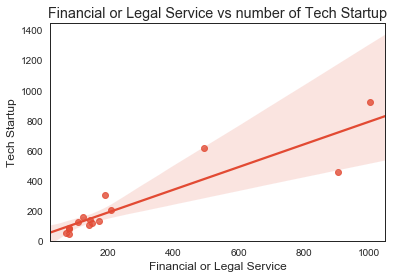

In [26]:
# number of Financial or Legal Service as an indicator of number of Tech Startup
sns.regplot(x="Financial or Legal Service", y="Tech Startup", data=startup_ecosystem)
plt.title('Financial or Legal Service vs number of Tech Startup')

plt.ylim(0,)

(0, 1404.2846446630886)

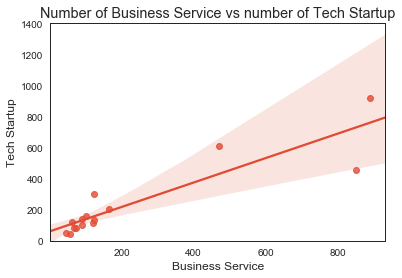

In [27]:
# number of Business Service as an indicator of number of Tech Startup
sns.regplot(x="Business Service", y="Tech Startup", data=startup_ecosystem)
plt.title('Number of Business Service vs number of Tech Startup')
plt.ylim(0,)

(0, 1007.9282250615986)

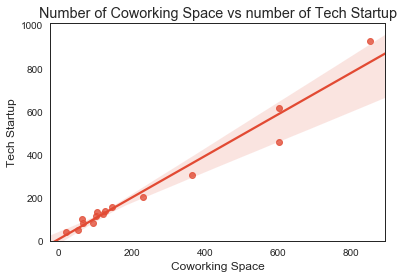

In [28]:
# number of Coworking_Space as an indicator of number of Tech Startup
sns.regplot(x="Coworking Space", y="Tech Startup", data=startup_ecosystem)
plt.title('Number of Coworking Space vs number of Tech Startup')

plt.ylim(0,)

(0, 972.2044998133447)

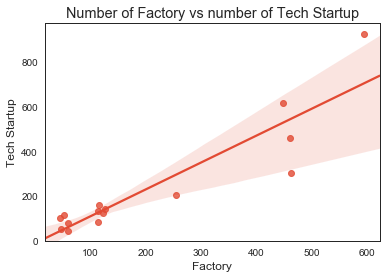

In [29]:
# number of Factory as an indicator of number of Tech Startup
sns.regplot(x="Factory", y="Tech Startup", data=startup_ecosystem)
plt.title('Number of Factory vs number of Tech Startup')

plt.ylim(0,)

In [30]:
startup_ecosystem.corr()

,Financial or Legal Service,Tech Startup,Business Service,Coworking Space,Factory,Insurance Office,Design Studio,Business Center,Government Building,Office,Library,Advertising Agency,Laboratory,College Classroom,College Academic Building,General College & University,History Museum,Recruiting Agency,City Hall,College Administrative Building,Science Museum,University,Trade School,Print Shop,Adult Education Center,College Library,Community College,College Science Building,Other Event,College Lab,Medical School,College Arts Building,College Auditorium,College Technology Building,College Engineering Building,College Bookstore,Industrial Estate,Conference,Museum,Research Station,College Communications Building,Street Fair,Capitol Building,College & University,Event Space,Convention
Financial or Legal Service,1.000000,0.907553,0.997483,0.936881,0.844101,0.704359,0.923699,0.946666,0.973747,0.870829,0.851459,0.803368,0.881376,0.754913,0.963081,0.967249,0.977061,0.570398,0.448334,0.976696,0.990390,0.593936,0.946636,0.958691,0.648932,0.833347,0.992327,0.961678,0.751483,0.899284,0.887903,0.950158,0.282976,0.870897,0.571285,0.980985,0.393394,0.977296,0.924234,0.906670,0.608424,0.777325,0.467731,0.125538,0.802238,0.770547
Tech Startup,0.907553,1.000000,0.897741,0.980450,0.914828,0.928536,0.986328,0.978075,0.938071,0.932966,0.939464,0.886283,0.950578,0.796619,0.899414,0.952194,0.937170,0.751279,0.650044,0.834973,0.892799,0.770458,0.827632,0.844905,0.855297,0.805005,0.915398,0.899178,0.559076,0.775166,0.904147,0.891146,0.475913,0.821201,0.715614,0.866926,0.520844,0.886869,0.871804,0.935650,0.689570,0.800597,0.631015,0.397168,0.886757,0.750023
Business Service,0.997483,0.897741,1.000000,0.931459,0.832456,0.693599,0.923723,0.934561,0.971373,0.851795,0.859593,0.818109,0.864658,0.742297,0.966505,0.968866,0.980477,0.576897,0.456597,0.970832,0.991863,0.593855,0.958438,0.949170,0.641338,0.851502,0.991039,0.954277,0.743056,0.906439,0.871901,0.951403,0.278811,0.843156,0.546649,0.979086,0.373586,0.975240,0.905503,0.911663,0.579829,0.758141,0.442634,0.133086,0.811620,0.779454
Coworking Space,0.936881,0.980450,0.931459,1.000000,0.959120,0.857193,0.982296,0.972362,0.975028,0.880248,0.948650,0.897154,0.903829,0.867455,0.955995,0.969297,0.963038,0.782399,0.680702,0.871789,0.919923,0.760936,0.876651,0.848946,0.835774,0.878088,0.942512,0.907826,0.687823,0.841690,0.907949,0.916611,0.510748,0.802396,0.648212,0.912890,0.600947,0.922516,0.850216,0.948388,0.704309,0.732822,0.650168,0.396062,0.915234,0.753967
Factory,0.844101,0.914828,0.832456,0.959120,1.000000,0.793435,0.906298,0.909276,0.921133,0.784618,0.891114,0.826076,0.813635,0.931935,0.901271,0.878656,0.877729,0.831390,0.738063,0.783420,0.816592,0.752049,0.774708,0.734371,0.838667,0.846655,0.847855,0.811086,0.740584,0.764770,0.884087,0.826181,0.612925,0.734118,0.611605,0.827547,0.788816,0.847926,0.738179,0.884372,0.741419,0.590794,0.742356,0.456831,0.882776,0.661645
Insurance Office,0.704359,0.928536,0.693599,0.857193,0.793435,1.000000,0.903987,0.851829,0.769848,0.843260,0.889879,0.858926,0.866074,0.671375,0.711412,0.814926,0.782441,0.787408,0.719751,0.589444,0.687522,0.832375,0.625756,0.629544,0.914487,0.675995,0.730716,0.706147,0.249704,0.573335,0.786395,0.745432,0.534034,0.640935,0.748647,0.645156,0.450713,0.669235,0.702204,0.840068,0.582043,0.700957,0.637117,0.566599,0.805845,0.703669
Design Studio,0.923699,0.986328,0.923723,0.982296,0.906298,0.903987,1.000000,0.966658,0.959237,0.891443,0.974045,0.933537,0.916430,0.800334,0.931171,0.973002,0.967800,0.778308,0.684557,0.843935,0.915669,0.776581,0.876118,0.840915,0.855512,0.869261,0.938393,0.896252,0.576118,0.819722,0.883756,0.925196,0.455189,0.771054,0.644756,0.894118,0.498775,0.898952,0.844620,0.972826,0.624972,0.750994,0.614367,0.421170,0.914886,0.810989
Business Center,0.946666,0.978075,0.934561,0.972362,0.909276,0.851829,0.966658,1.000000,0.954515,0.955175,0.899192,0.821474,0.968166,0.787006,0.914135,0.944645,0.950431,0.655724,0.536079,0.905987,0.93823

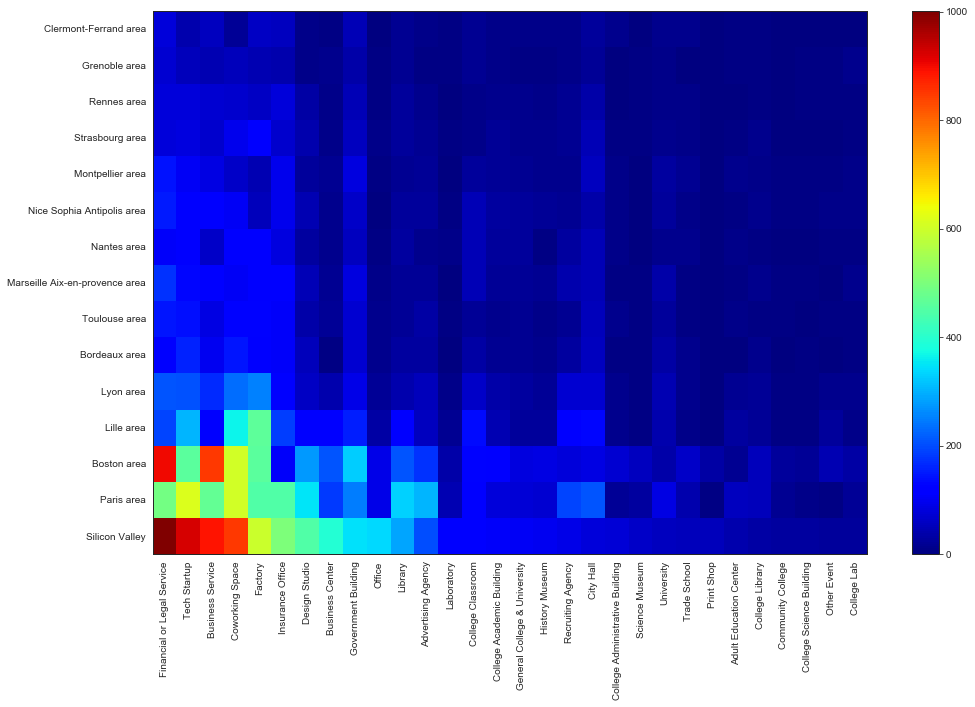

In [31]:
startup_top_category = startup_ecosystem.iloc[:, : 30]

fig, ax = plt.subplots(figsize=(16, 10))
im = ax.pcolor(startup_top_category, cmap='jet')

#move ticks and labels to the center
ax.set_xticks(np.arange(startup_top_category.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(startup_top_category.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(startup_top_category.columns, minor=False)
ax.set_yticklabels(startup_top_category.index, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [32]:
startup_top_category_trans = startup_top_category.iloc[:, : 10].transpose()
startup_top_category_trans

,Silicon Valley,Paris area,Boston area,Lille area,Lyon area,Bordeaux area,Toulouse area,Marseille Aix-en-provence area,Nantes area,Nice Sophia Antipolis area,Montpellier area,Strasbourg area,Rennes area,Grenoble area,Clermont-Ferrand area
Financial or Legal Service,1002.0,493.0,903.0,192.0,211.0,124.0,145.0,173.0,108.0,152.0,142.0,81.0,81.0,72.0,81.0
Tech Startup,924.0,615.0,459.0,304.0,204.0,158.0,140.0,133.0,122.0,115.0,103.0,84.0,81.0,52.0,42.0
Business Service,890.0,470.0,851.0,124.0,166.0,100.0,90.0,122.0,63.0,120.0,89.0,69.0,73.0,45.0,56.0
Coworking Space,851.0,603.0,604.0,365.0,232.0,146.0,127.0,105.0,123.0,103.0,65.0,96.0,67.0,53.0,20.0
Factory,595.0,448.0,460.0,463.0,254.0,116.0,126.0,113.0,122.0,52.0,45.0,113.0,59.0,46.0,60.0
Insurance Office,503.0,448.0,109.0,185.0,124.0,107.0,106.0,123.0,86.0,95.0,95.0,68.0,81.0,43.0,58.0
Design Studio,448.0,351.0,275.0,125.0,60.0,51.0,38.0,48.0,30.0,46.0,26.0,40.0,33.0,9.0,9.0
Business Center,395.0,183.0,210.0,110.0,41.0,7.0,21.0,19.0,12.0,15.0,16.0,10.0,9.0,14.0,4.0
Government Building,348.0,247.0,325.0,154.0,93.0,73.0,72.0,84.0,56.0,64.0,86.0,58.0,50.0,37.0,47.0
Office,339.0,92.0,92.0,35.0,20.0,13.0,13.0,11.0,7.0,3.0,4.0,8.0,7.0,6.0,0.0


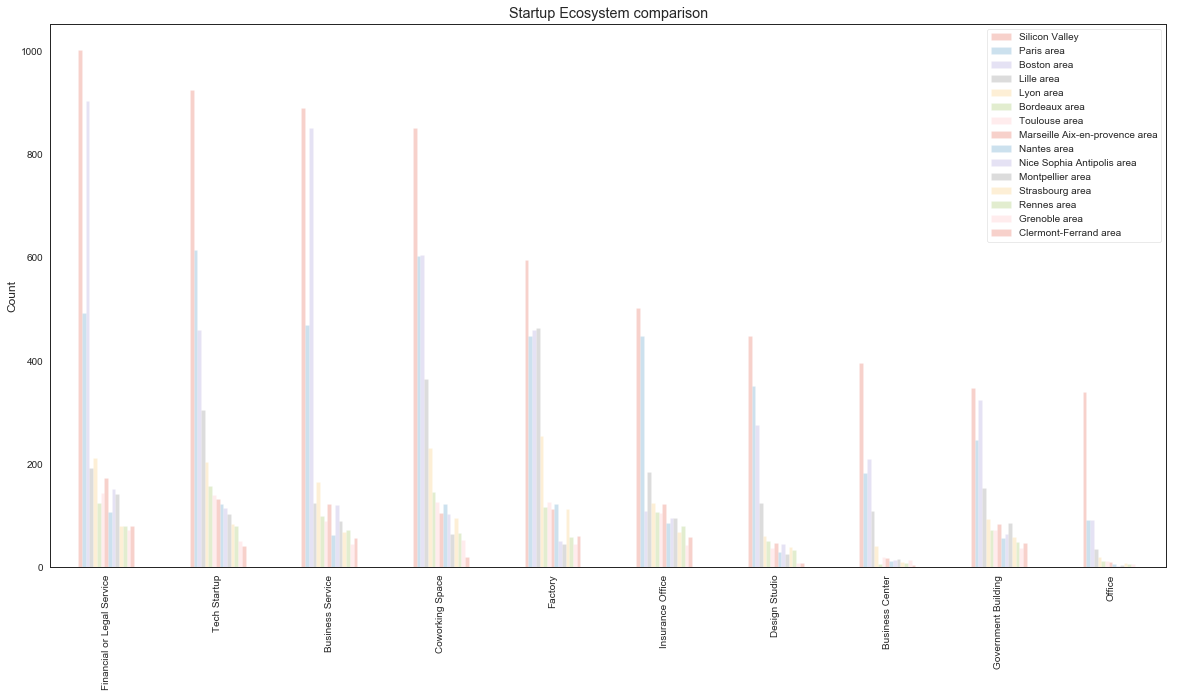

In [33]:
startup_top_category_trans.plot(kind='bar', 
             alpha=0.25, # 0-1, default value a= 0.5
             stacked=False,
             figsize=(20, 10),
            )

plt.title('Startup Ecosystem comparison')
plt.ylabel('Count')

plt.show()

### 2.3. K-means Clustering

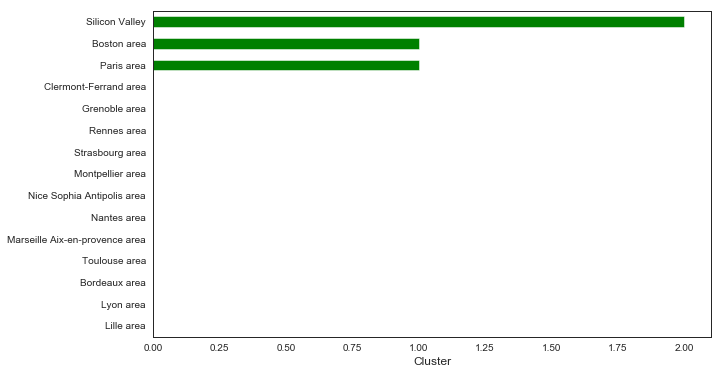

In [34]:
num_clusters = 3
cluster_dataset_3 = startup_ecosystem.copy()
k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=12)
k_means.fit(cluster_dataset_3)
labels = k_means.labels_
cluster_dataset_3["Labels"] = labels
cluster_dataset_3["Labels"].sort_values().plot(kind='barh', figsize=(10, 6), color='green')
plt.xlabel('Cluster')
plt.show()

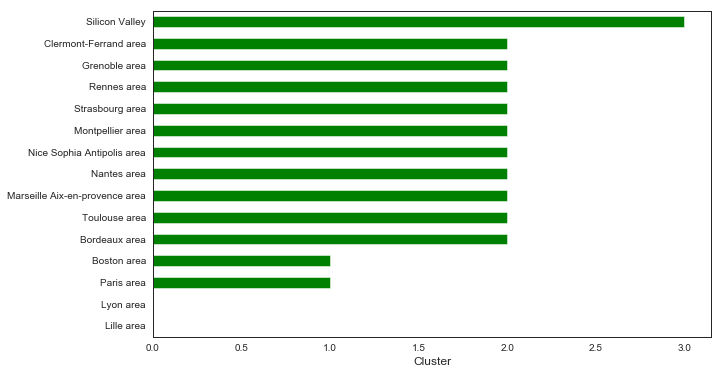

In [35]:
num_clusters = 4
cluster_dataset_4 = startup_ecosystem.copy()
k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=12)
k_means.fit(cluster_dataset_4)
labels = k_means.labels_
cluster_dataset_4["Labels"] = labels
cluster_dataset_4["Labels"].sort_values().plot(kind='barh', figsize=(10, 6), color='green')
plt.xlabel('Cluster')
plt.show()

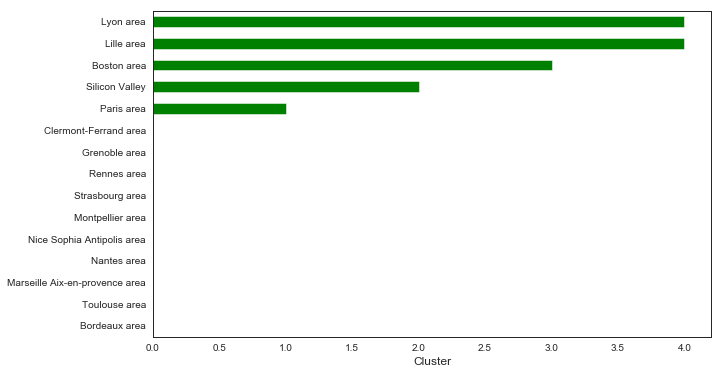

In [36]:
num_clusters = 5
cluster_dataset_5 = startup_ecosystem.copy()
k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=12)
k_means.fit(cluster_dataset_5)
labels = k_means.labels_
cluster_dataset_5["Labels"] = labels
cluster_dataset_5["Labels"].sort_values().plot(kind='barh', figsize=(10, 6), color='green')
plt.xlabel('Cluster') 
plt.show()

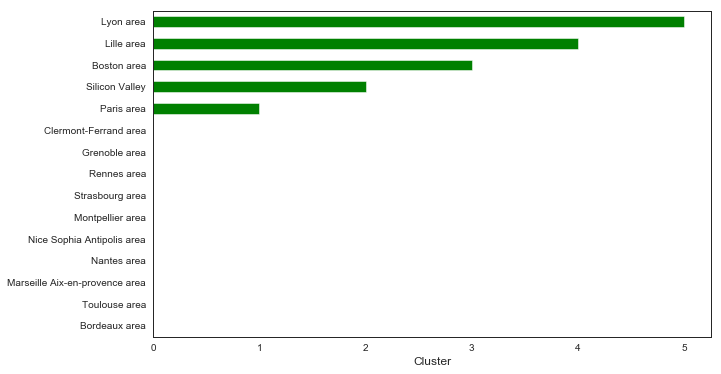

In [37]:
num_clusters = 6
cluster_dataset_6 = startup_ecosystem.copy()
k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=12)
k_means.fit(cluster_dataset_6)
labels = k_means.labels_
cluster_dataset_6["Labels"] = labels
cluster_dataset_6["Labels"].sort_values().plot(kind='barh', figsize=(10, 6), color='green')
plt.xlabel('Cluster')
plt.show()

### Data Evaluation

We use the Elbow method to better understand what a good k number of clusters would be based on the sum of squared distance (SSE) between data points and their assigned clusters’ centroids. 

Text(0, 0.5, 'Sum of squared distance')

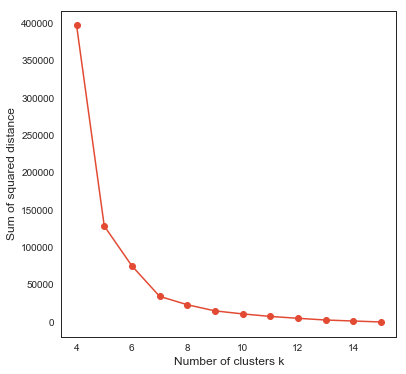

In [38]:
# Run the Kmeans algorithm and get the index of data points clusters
sse = []
list_k = list(range(4, 16))

for num_clusters in list_k:
    k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=12)
    k_means.fit(startup_ecosystem)
    sse.append(k_means.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel('Number of clusters k')
plt.ylabel('Sum of squared distance')


Usually, the best value for k is at the spot where SSE starts to flatten out and forming an elbow. Unfortunatelly, as you can see on the graph above, there is no sudden flattening. 

/Users/Matt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


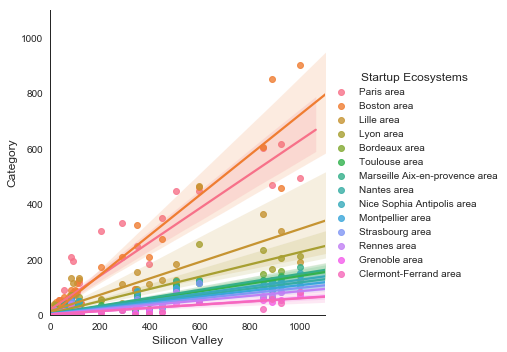

In [39]:
data = startup_ecosystem.transpose()
data = data.melt('Silicon Valley', var_name='Startup Ecosystems',  value_name='Category')
g = sns.lmplot(x="Silicon Valley", y="Category", hue='Startup Ecosystems', data=data)
g.set(xlim=(0, 1100),ylim=(0, 1100))
plt.show()

## 3. Normalized Data Analysis <a id='item3'></a>

Now, let's compare the various area by normlizing the data to the equivalent number in Silicon Valley.

### 3.1. Data preparation

In [40]:
normalized_startup_ecosystem = startup_ecosystem.copy()
for i in normalized_startup_ecosystem.index:
    normalized_startup_ecosystem.loc[i]= normalized_startup_ecosystem.loc[i]/normalized_startup_ecosystem.loc[i,'Tech Startup']
normalized_startup_ecosystem

,Financial or Legal Service,Tech Startup,Business Service,Coworking Space,Factory,Insurance Office,Design Studio,Business Center,Government Building,Office,Library,Advertising Agency,Laboratory,College Classroom,College Academic Building,General College & University,History Museum,Recruiting Agency,City Hall,College Administrative Building,Science Museum,University,Trade School,Print Shop,Adult Education Center,College Library,Community College,College Science Building,Other Event,College Lab,Medical School,College Arts Building,College Auditorium,College Technology Building,College Engineering Building,College Bookstore,Industrial Estate,Conference,Museum,Research Station,College Communications Building,Street Fair,Capitol Building,College & University,Event Space,Convention
Silicon Valley,1.084416,1.0,0.963203,0.920996,0.643939,0.544372,0.484848,0.427489,0.376623,0.366883,0.310606,0.217532,0.134199,0.125541,0.114719,0.110390,0.107143,0.098485,0.088745,0.083333,0.070346,0.059524,0.057359,0.055195,0.044372,0.037879,0.032468,0.032468,0.025974,0.025974,0.024892,0.023810,0.021645,0.020563,0.019481,0.019481,0.015152,0.012987,0.012987,0.009740,0.008658,0.008658,0.008658,0.005411,0.004329,0.004329
Paris area,0.801626,1.0,0.764228,0.980488,0.728455,0.728455,0.570732,0.297561,0.401626,0.149593,0.538211,0.492683,0.071545,0.183740,0.133333,0.125203,0.115447,0.317073,0.338211,0.035772,0.047154,0.143089,0.068293,0.011382,0.089431,0.084553,0.027642,0.016260,0.006504,0.034146,0.019512,0.029268,0.063415,0.001626,0.016260,0.014634,0.024390,0.006504,0.003252,0.013008,0.006504,0.001626,0.013008,0.040650,0.006504,0.008130
Boston area,1.967320,1.0,1.854031,1.315904,1.002179,0.237473,0.599129,0.457516,0.708061,0.200436,0.457516,0.379085,0.082789,0.274510,0.252723,0.185185,0.191721,0.178649,0.191721,0.156863,0.126362,0.084967,0.143791,0.076253,0.037037,0.115468,0.058824,0.045752,0.098039,0.069717,0.030501,0.047930,0.041394,0.019608,0.006536,0.041394,0.032680,0.021786,0.013072,0.015251,0.010893,0.004357,0.010893,0.006536,0.006536,0.008715
Lille area,0.631579,1.0,0.407895,1.200658,1.523026,0.608553,0.411184,0.361842,0.506579,0.115132,0.368421,0.190789,0.055921,0.440789,0.148026,0.085526,0.088816,0.371711,0.430921,0.039474,0.019737,0.138158,0.029605,0.000000,0.095395,0.075658,0.023026,0.023026,0.088816,0.029605,0.026316,0.013158,0.115132,0.013158,0.013158,0.013158,0.125000,0.006579,0.003289,0.009868,0.023026,0.000000,0.032895,0.055921,0.006579,0.003289
Lyon area,1.034314,1.0,0.813725,1.137255,1.245098,0.607843,0.294118,0.200980,0.455882,0.098039,0.205882,0.254902,0.053922,0.313725,0.191176,0.137255,0.098039,0.348039,0.352941,0.068627,0.024510,0.220588,0.063725,0.004902,0.083333,0.102941,0.024510,0.019608,0.063725,0.063725,0.053922,0.019608,0.181373,0.014706,0.063725,0.004902,0.049020,0.009804,0.004902,0.000000,0.024510,0.000000,0.014706,0.024510,0.004902,0.004902
Bordeaux area,0.784810,1.0,0.632911,0.924051,0.734177,0.677215,0.322785,0.044304,0.462025,0.082278,0.183544,0.177215,0.012658,0.208861,0.113924,0.120253,0.082278,0.196203,0.367089,0.044304,0.037975,0.221519,0.094937,0.000000,0.000000,0.082278,0.018987,0.031646,0.018987,0.037975,0.000000,0.012658,0.126582,0.006329,0.012658,0.006329,0.044304,0.000000,0.000000,0.000000,0.025316,0.006329,0.006329,0.063291,0.006329,0.000000
Toulouse area,1.035714,1.0,0.642857,0.907143,0.900000,0.757143,0.271429,0.150000,0.514286,0.092857,0.157143,0.242857,0.035714,0.142857,0.107143,0.114286,0.064286,0.135714,0.378571,0.085714,0.050000,0.178571,0.050000,0.000000,0.078571,0.035714,0.035714,0.007143,0.028571,0.035714,0.014286,0.028571,0.142857,0.014286,0.057143,0.028571,0.021429,0.000000,0.007143,0.000000,0.007143,0.007143,0.035714,0.014286,0.000000,0.007143
Marseille Aix-en-provence area,1.300752,1.0,0.917293,0.789474,0.849624,0.924812,0.360902,0.142857,0.631579,0.082707,0.150376,0.165414,0.022556,0.375940,0.157895,0.165414,0.142857,0.315789,0.375940,0.030075,0.052632,0.285714,0.045113,0.022556,0.052632,0.112782,0.0

### 3.2. Data Visualization <a id='item3'></a>

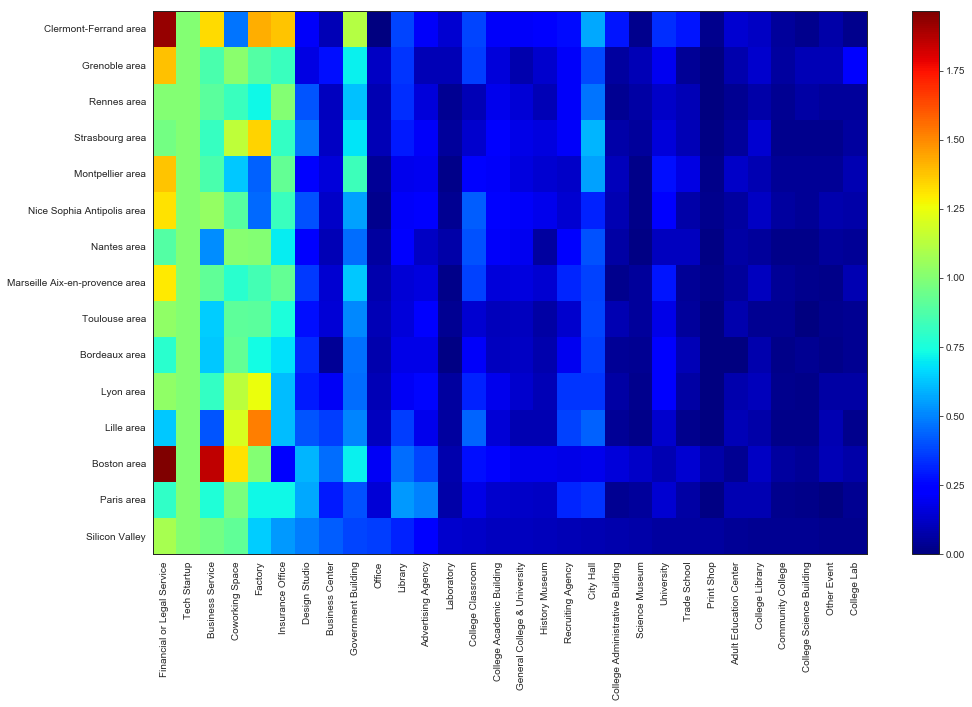

In [41]:
startup_top_category = normalized_startup_ecosystem.iloc[:, : 30]

fig, ax = plt.subplots(figsize=(16, 10))
im = ax.pcolor(startup_top_category, cmap='jet')

#move ticks and labels to the center
ax.set_xticks(np.arange(startup_top_category.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(startup_top_category.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(startup_top_category.columns, minor=False)
ax.set_yticklabels(startup_top_category.index, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

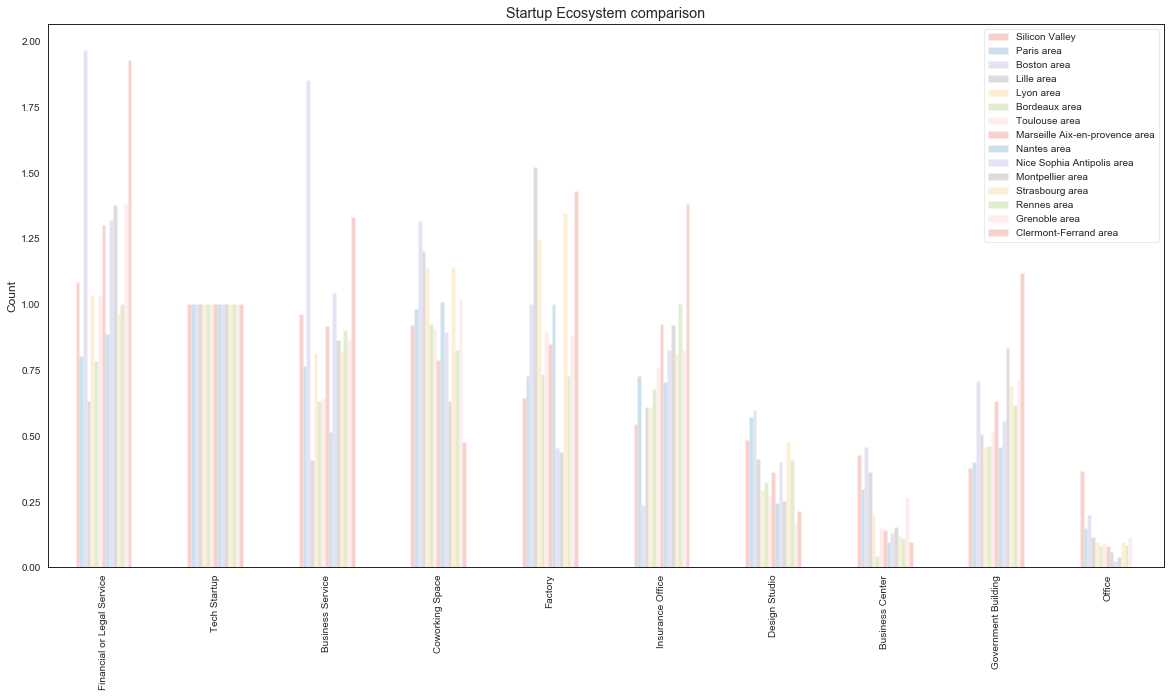

In [42]:
startup_top_category_trans = normalized_startup_ecosystem.iloc[:, : 10].transpose()
startup_top_category_trans.plot(kind='bar', 
             alpha=0.25, # 0-1, default value a= 0.5
             stacked=False,
             figsize=(20, 10),
            )

plt.title('Startup Ecosystem comparison')
plt.ylabel('Count')

plt.show()

### 3.3. K-means Clustering

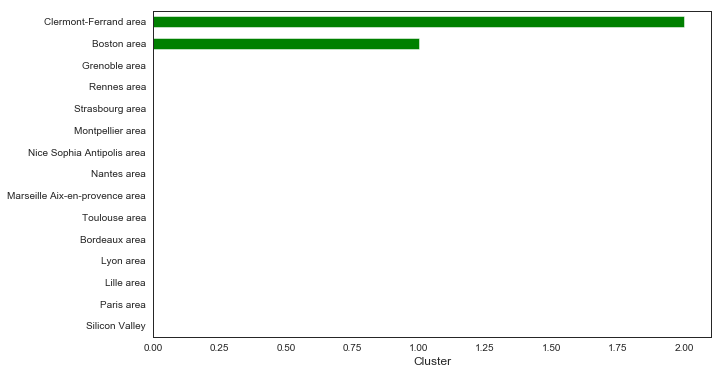

In [43]:
num_clusters = 3
cluster_dataset_3 = normalized_startup_ecosystem.copy()
k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=12)
k_means.fit(cluster_dataset_3)
labels = k_means.labels_
cluster_dataset_3["Labels"] = labels
cluster_dataset_3["Labels"].sort_values().plot(kind='barh', figsize=(10, 6), color='green')
plt.xlabel('Cluster')
plt.show()

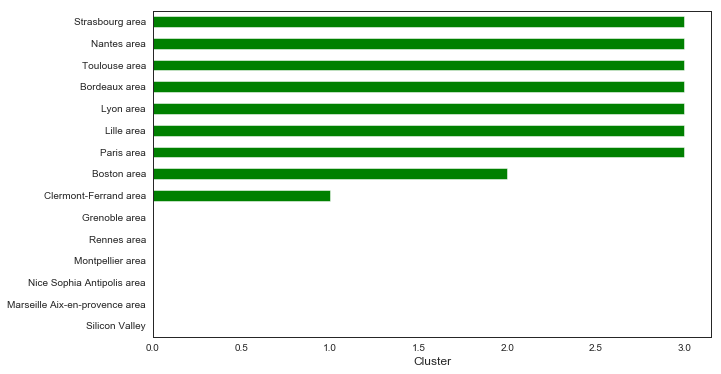

In [44]:
num_clusters = 4
cluster_dataset_4 = normalized_startup_ecosystem.copy()
k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=12)
k_means.fit(cluster_dataset_4)
labels = k_means.labels_
cluster_dataset_4["Labels"] = labels
cluster_dataset_4["Labels"].sort_values().plot(kind='barh', figsize=(10, 6), color='green')
plt.xlabel('Cluster')
plt.show()

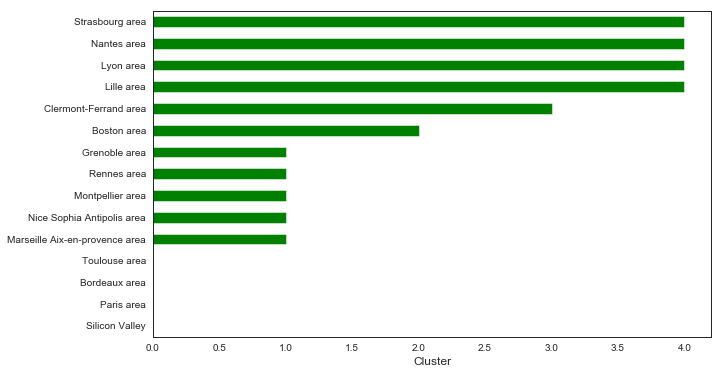

In [45]:
num_clusters = 5
cluster_dataset_5 = normalized_startup_ecosystem.copy()
k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=12)
k_means.fit(cluster_dataset_5)
labels = k_means.labels_
cluster_dataset_5["Labels"] = labels
cluster_dataset_5["Labels"].sort_values().plot(kind='barh', figsize=(10, 6), color='green')
plt.xlabel('Cluster') 
plt.show()

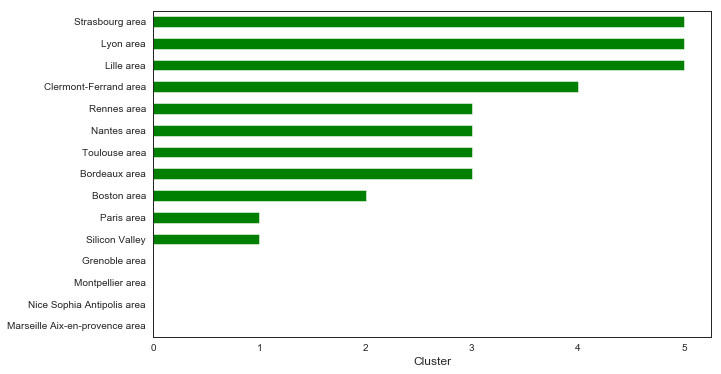

In [46]:
num_clusters = 6
cluster_dataset_6 = normalized_startup_ecosystem.copy()
k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=12)
k_means.fit(cluster_dataset_6)
labels = k_means.labels_
cluster_dataset_6["Labels"] = labels
cluster_dataset_6["Labels"].sort_values().plot(kind='barh', figsize=(10, 6), color='green')
plt.xlabel('Cluster')
plt.show()

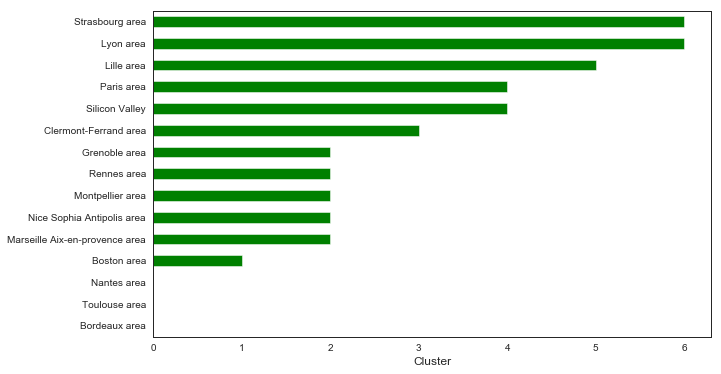

In [47]:
num_clusters = 7
cluster_dataset_7 = normalized_startup_ecosystem.copy()
k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=12)
k_means.fit(cluster_dataset_7)
labels = k_means.labels_
cluster_dataset_7["Labels"] = labels
cluster_dataset_7["Labels"].sort_values().plot(kind='barh', figsize=(10, 6), color='green')
plt.xlabel('Cluster')
plt.show()

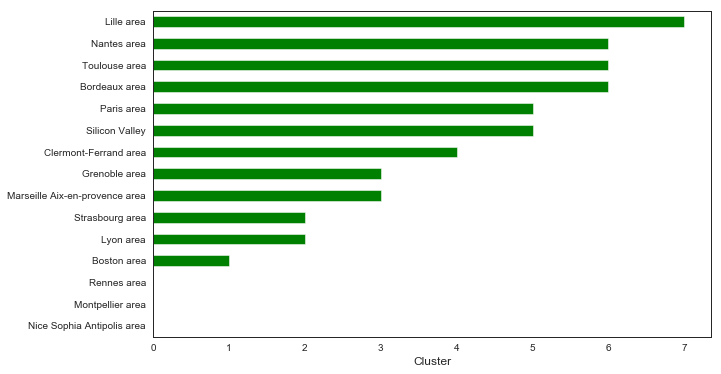

In [48]:
num_clusters = 8
cluster_dataset_8 = normalized_startup_ecosystem.copy()
k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=12)
k_means.fit(cluster_dataset_8)
labels = k_means.labels_
cluster_dataset_8["Labels"] = labels
cluster_dataset_8["Labels"].sort_values().plot(kind='barh', figsize=(10, 6), color='green')
plt.xlabel('Cluster')
plt.show()

### Data Evaluation

We use the Elbow method to better understand what a good k number of clusters would be based on the sum of squared distance (SSE) between data points and their assigned clusters’ centroids. 

Text(0, 0.5, 'Sum of squared distance')

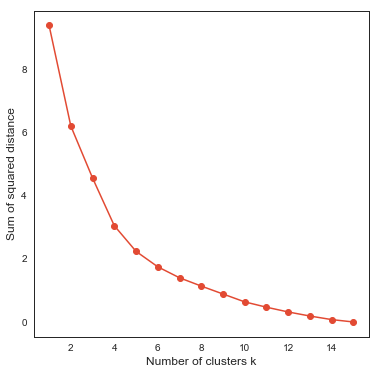

In [49]:
# Run the Kmeans algorithm and get the index of data points clusters
sse = []
list_k = list(range(1, 16))

for num_clusters in list_k:
    k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=12)
    k_means.fit(normalized_startup_ecosystem)
    sse.append(k_means.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel('Number of clusters k')
plt.ylabel('Sum of squared distance')


Usually, the best value for k is at the spot where SSE starts to flatten out and forming an elbow. Unfortunatelly, as we can see on the graph above, there is no sudden flattening meaning that the more cluster the smaller the SSE.

### Linear regression

Another way to investigate the similiraties between the various Startup Ecosystem is to compare them to Silicon Valley Startup Ecosystem using linear regression.

As seen below, we plotted the normalized number of places in each category for the various Startup Ecosystem as a function of the normalized number of places in each category for Silicon Valley.

/Users/Matt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


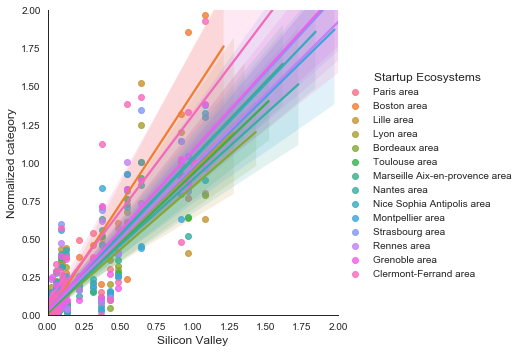

In [50]:
data = normalized_startup_ecosystem.transpose()
data = data.melt('Silicon Valley', var_name='Startup Ecosystems',  value_name='Normalized category')
g = sns.lmplot(x="Silicon Valley", y="Normalized category", hue='Startup Ecosystems', data=data)
g.set(xlim=(0, 2),ylim=(0, 2))
plt.show()

To evaluate the results of each of these linear regressions, we looked at the slope, intercept and Pearson correlation coefficient for each Startup Ecosystem compared to the one of Silicon Valley.

In [51]:
data = normalized_startup_ecosystem.transpose()
reg_eval = pd.DataFrame(columns=['Startup Ecosystem','slope','intercept','Pearson correlation coef.','p-value'])
for i in data:
    temp = pd.DataFrame(columns=['Startup Ecosystem','slope','intercept','Pearson correlation coef.','p-value'])
    temp.loc['Startup Ecosystem']=i
    temp['slope']=linregress(data[i], data['Silicon Valley']).slope
    temp['intercept']=linregress(data[i], data['Silicon Valley']).intercept
    temp['Pearson correlation coef.']=linregress(data[i], data['Silicon Valley']).rvalue
    temp['p-value']=linregress(data[i], data['Silicon Valley']).pvalue
    reg_eval = pd.concat([reg_eval, temp], sort=True)
    
reg_eval.set_index('Startup Ecosystem', inplace=True)
reg_eval.sort_values(['Pearson correlation coef.'], ascending=False, axis=0, inplace=True)

reg_eval

,Pearson correlation coef.,intercept,p-value,slope
Startup Ecosystem,,,,
Silicon Valley,1.000000,0.000000,0.000000e+00,1.000000
Boston area,0.939089,0.022968,4.946566e-22,0.606917
Paris area,0.936045,-0.006371,1.401261e-21,0.956966
Nice Sophia Antipolis area,0.923840,0.006038,5.758337e-20,0.860300
Toulouse area,0.923809,0.017599,5.807211e-20,0.934445
Grenoble area,0.922341,0.007064,8.704060e-20,0.810446
Rennes area,0.913354,0.010903,8.815359e-19,0.879879
Bordeaux area,0.912807,0.016579,1.006492e-18,1.008904
Marseille Aix-en-provence area,0.912608,0.007730,1.056064e-18,0.834089


As can be seen in the table above, Paris area has both the closest correlation coeffcient to 1 and the closest slope to 1. This seems to indicate that Paris Startup Ecosystem would be the closest to Silicon Valley Startup Ecosystem. Boston has a higher correlation coefficient than Paris but the slope is far from 1. 

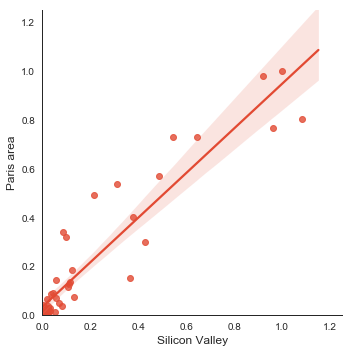

In [52]:
g = sns.lmplot(x="Silicon Valley", y="Paris area", data=data)
g.set(xlim=(0, 1.25),ylim=(0, 1.25))
plt.show()

## 4. Conclusions <a id='item4'></a>

In this notebook, we have compared 15 Startup Ecosystems located in France and in the US, based on data from Foursquare places API. K-means clustering seems to indicate that the closest Startup Ecosystem to Silicon Valley would be Paris. This seems to be supported by both absolute and relative (normalized) comparisons. According fo Foursquare Places API, Paris is the French city with the most Tech Startups (615 places listed in the Tech Startups category). While impressive, it's far less than the 924 places listed in the Tech Startups category within Silicon Valley. Clustering of the normalized data shows that Paris is in the same cluster as Silicon Valley for k = 6 or 7 clusters. However, when evaluating the clustering model, the Elbow method indicates that the optimal number of cluster converge toward 15 which is the total number of Startup Ecosystems compared. This may indicate that each ecosystem is significantly different from the others and thus the model did not find enough similarity when comparing the selected features. Finally, linear regression was also used to compare the 15 Startup Ecosystems. Linear regression results seem to support the fact that Paris Startup Ecosysteme would be the closest to Silicon Valley Startup Ecosystem.